In [71]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
import os



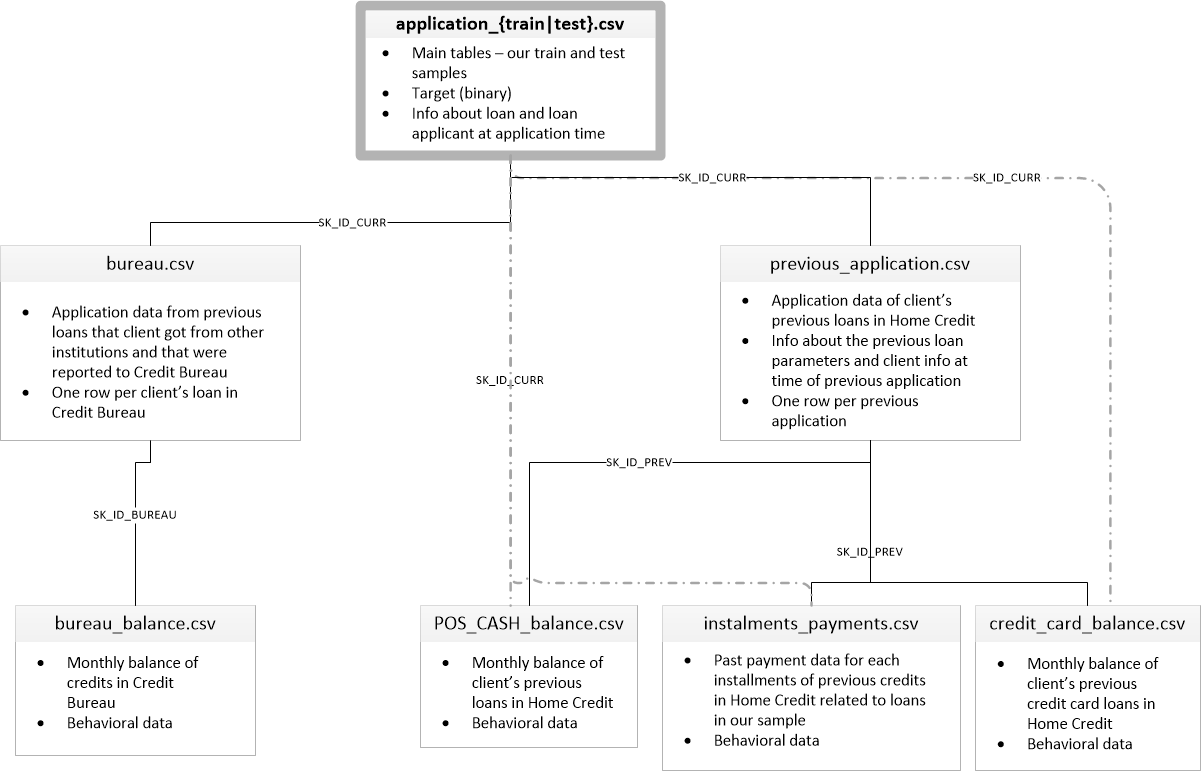

In [72]:
# https://www.kaggle.com/code/gorilla1212/notebookb37ce29d18

In [73]:

dossier = r'C:\Users\Hilbert\Documents\OpenClassRoom\Projet_7\Projet+Mise+en+prod+-+home-credit-default-risk'

dfs = []
for fichier in os.listdir(dossier):
    if fichier.endswith('.csv'):
        chemin_fichier = os.path.join(dossier, fichier)
        df = pd.read_csv(chemin_fichier, encoding='latin-1')
        dfs.append(df)



KeyboardInterrupt: 

In [ ]:
len(dfs)

10

In [ ]:
test=dfs[0]

# Train columns

In [ ]:
train=dfs[1]
train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [ ]:
for i in train.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

SK_ID_CURR : Identifiant unique pour chaque demande de crédit.  
TARGET : Indicateur binaire indiquant si le client a eu des difficultés de remboursement (1) ou non (0).  
NAME_CONTRACT_TYPE : Type de contrat du prêt.  
CODE_GENDER : Genre du client.  
FLAG_OWN_CAR : Indique si le client possède une voiture (1) ou non (0).  
FLAG_OWN_REALTY : Indique si le client possède une propriété immobilière (1) ou non (0).  
CNT_CHILDREN : Nombre d'enfants du client.  
AMT_INCOME_TOTAL : Revenu total du client.  
AMT_CREDIT : Montant du crédit demandé par le client.  
AMT_ANNUITY : Montant de l'annuité du crédit.  
AMT_GOODS_PRICE : Prix des biens pour lesquels le crédit est demandé.  
NAME_TYPE_SUITE : Type de suite de noms pour le client.  
NAME_INCOME_TYPE : Source de revenu du client.  
NAME_EDUCATION_TYPE : Niveau d'éducation du client.  
NAME_FAMILY_STATUS : Statut familial du client.  
NAME_HOUSING_TYPE : Type de logement du client.  
REGION_POPULATION_RELATIVE : Population relative de la région où vit le client.  
DAYS_BIRTH : Âge du client en jours négatifs.  
DAYS_EMPLOYED : Nombre de jours depuis le début de l'emploi du client (positif si actif, négatif sinon).  
DAYS_REGISTRATION : Nombre de jours depuis l'enregistrement de la demande.  
DAYS_ID_PUBLISH : Nombre de jours depuis la publication de l'identification du client.  
OWN_CAR_AGE : Âge de la voiture du client.  
FLAG_MOBIL : Indique si le client a un téléphone mobile (1) ou non (0).  
FLAG_EMP_PHONE : Indique si le client a un téléphone professionnel (1) ou non (0).  
FLAG_WORK_PHONE : Indique si le client a un téléphone professionnel pour le travail (1) ou non (0).  
FLAG_CONT_MOBILE : Indique si le client a un téléphone mobile (1) ou non (0).  
FLAG_PHONE : Indique si le client a un téléphone (1) ou non (0).  
FLAG_EMAIL : Indique si le client a fourni une adresse e-mail (1) ou non (0).  
OCCUPATION_TYPE : Type d'occupation du client.  
CNT_FAM_MEMBERS : Nombre de membres de la famille.  
REGION_RATING_CLIENT : Évaluation du client basée sur la région.  
REGION_RATING_CLIENT_W_CITY : Évaluation du client basée sur la région avec la ville.  
WEEKDAY_APPR_PROCESS_START : Jour de la semaine où la demande a été traitée.  
HOUR_APPR_PROCESS_START : Heure du jour où la demande a été traitée.  
REG_REGION_NOT_LIVE_REGION : Indique si la région de l'adresse permanente du client ne correspond pas à la région où il vit.  
REG_REGION_NOT_WORK_REGION : Indique si la région de l'adresse permanente du client ne correspond pas à la région où il travaille.  
LIVE_REGION_NOT_WORK_REGION : Indique si la région où le client vit ne correspond pas à la région où il travaille.  
REG_CITY_NOT_LIVE_CITY : Indique si la ville de l'adresse permanente du client ne correspond pas à la ville où il vit.  
REG_CITY_NOT_WORK_CITY : Indique si la ville de l'adresse permanente du client ne correspond pas à la ville où il travaille.  
LIVE_CITY_NOT_WORK_CITY : Indique si la ville où le client vit ne correspond pas à la ville où il travaille.  
ORGANIZATION_TYPE : Type d'organisation où le client travaille.  
EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 : Indicateurs normalisés externes pour évaluer la fiabilité du client.  
APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG : Moyenne des caractéristiques relatives au logement.
APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE : Mode des caractéristiques relatives au logement.
APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI : Médiane des caractéristiques relatives au logement.  
FONDKAPREMONT_MODE : Mode du fonds du pré-montage.  
HOUSETYPE_MODE : Mode du type de maison.  
TOTALAREA_MODE : Mode de la superficie totale.  
WALLSMATERIAL_MODE : Mode du matériau des murs.  
EMERGENCYSTATE_MODE : Mode de l'état d'urgence.  
OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE : Observations et défauts dans le cercle social du client.  
DAYS_LAST_PHONE_CHANGE : Nombre de jours depuis le dernier changement de numéro de téléphone.  
FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21 : Indicateurs pour les documents fournis.  
AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR : Nombre de demandes de crédit auprès du bureau de crédit au cours de différentes périodes.  

In [ ]:
train['NAME_HOUSING_TYPE']

0         House / apartment
1         House / apartment
2         House / apartment
3         House / apartment
4         House / apartment
                ...        
307506         With parents
307507    House / apartment
307508    House / apartment
307509    House / apartment
307510    House / apartment
Name: NAME_HOUSING_TYPE, Length: 307511, dtype: object

In [ ]:
train['EXT_SOURCE_1']

0         0.083037
1         0.311267
2              NaN
3              NaN
4              NaN
            ...   
307506    0.145570
307507         NaN
307508    0.744026
307509         NaN
307510    0.734460
Name: EXT_SOURCE_1, Length: 307511, dtype: float64

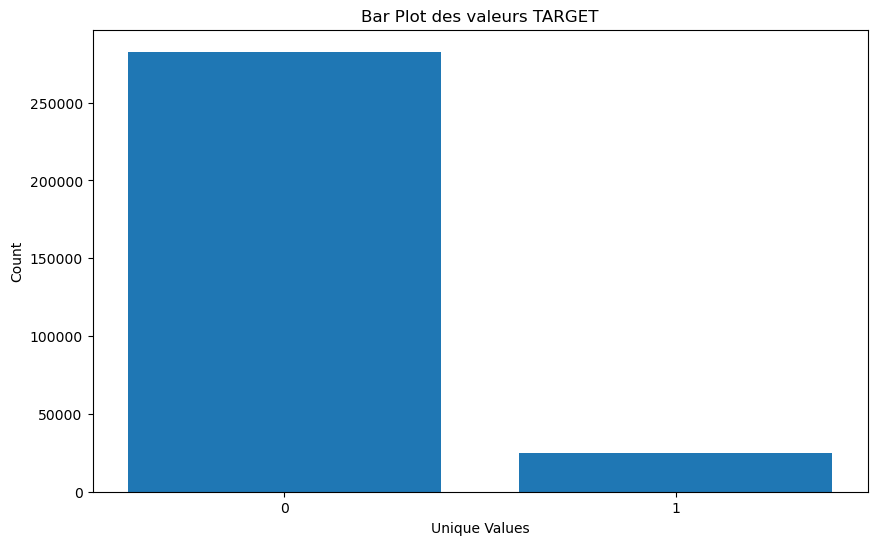

In [ ]:
value_counts =train['TARGET'].value_counts()

unique_values = value_counts.index
counts = value_counts.values

plt.figure(figsize=(10, 6))
plt.bar(range(len(unique_values)), counts, tick_label=unique_values)
plt.title('Bar Plot des valeurs TARGET')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
print('nombre de colonnes numeriques: ',len(train.select_dtypes(include=['int', 'float']).columns))

nombre de colonnes numeriques:  106


## nan values

In [ ]:
missing_values = train.isna().sum()

missing_columns_df = missing_values[missing_values > 0].to_frame()

missing_columns_df.columns = ['Missing Values']

In [ ]:
missing_columns_df.sort_values(by='Missing Values', ascending=False)


Missing Values
COMMONAREA_MEDI                   214865
COMMONAREA_AVG                    214865
COMMONAREA_MODE                   214865
NONLIVINGAPARTMENTS_MEDI          213514
NONLIVINGAPARTMENTS_MODE          213514
...                                  ...
EXT_SOURCE_2                         660
AMT_GOODS_PRICE                      278
AMT_ANNUITY                           12
CNT_FAM_MEMBERS                        2
DAYS_LAST_PHONE_CHANGE                 1

[67 rows x 1 columns]

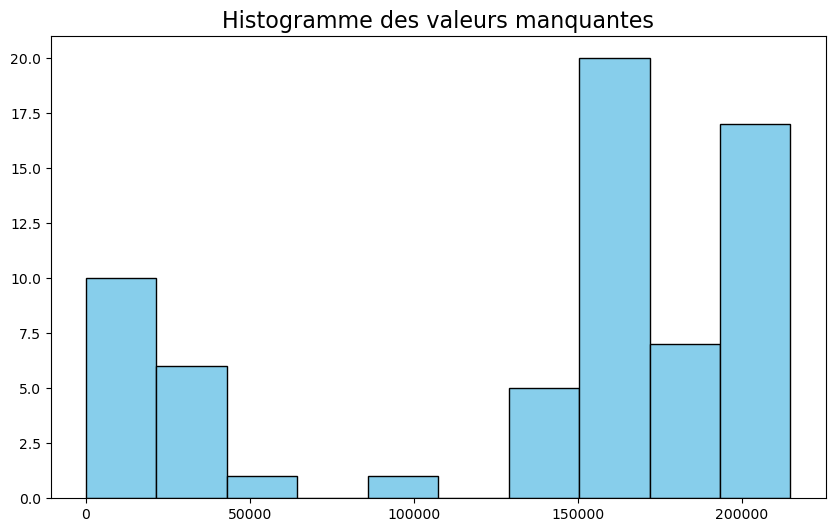

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
missing_columns_df.hist(ax=ax, color='skyblue', edgecolor='black', grid=False)

plt.title('Histogramme des valeurs manquantes', fontsize=16)

plt.show() 

## Colonnes numeriques

In [ ]:
numeric_columns = train.select_dtypes(include=['int', 'float'])
numeric_columns

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                -637  ...                 0                 0   
1               -1188  ...                 0                 0   
2                -225  ...                 0                 0   
3               -3039  ...                 0                 0   
4               -3038  ...                 0                 0   
...               ...  ...               ...               ...   
307506           -236  ...                 0                 0   
307507         365243  ...                 0                 0   
307508          -7921  ...                 0                 0   
307509          -4786  ...                 0                 0   
307510          -1262  ...                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      0                 0                         0.0   
1                      0                 0                         0.0   
2                      0                 0                         0.0   
3                      0                 0                         NaN   
4                      0                 0                         0.0   
...                  ...               ...                         ...   
307506                 0                 0                         NaN   
307507                 0                 0                         NaN   
307508                 0                 0                         1.0   
307509                 0                 0                         0.0   
307510                 0                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             NaN                         NaN   
4                             0.0                         0.0   
...                           ...                         ...   
307506               

In [ ]:
selected_columns = numeric_columns.columns[~numeric_columns.columns.isin(['SK_ID_CURR', 'TARGET'])]
numeric_columns[selected_columns].describe().round(2)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
count     307511.00      3.075110e+05   307511.00    307499.00   
mean           0.42      1.687979e+05   599026.00     27108.57   
std            0.72      2.371231e+05   402490.78     14493.74   
min            0.00      2.565000e+04    45000.00      1615.50   
25%            0.00      1.125000e+05   270000.00     16524.00   
50%            0.00      1.471500e+05   513531.00     24903.00   
75%            1.00      2.025000e+05   808650.00     34596.00   
max           19.00      1.170000e+08  4050000.00    258025.50   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count        307233.00                   307511.00   307511.00      307511.00   
mean         538396.21                        0.02   -16037.00       63815.05   
std          369446.46                        0.01     4363.99      141275.77   
min           40500.00                        0.00   -25229.00      -17912.00   
25%          238500.00                        0.01   -19682.00       -2760.00   
50%          450000.00                        0.02   -15750.00       -1213.00   
75%          679500.00                        0.03   -12413.00        -289.00   
max         4050000.00                        0.07    -7489.00      365243.00   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  FLAG_DOCUMENT_18  \
count          307511.00        307511.00  ...         307511.00   
mean            -4986.12         -2994.20  ...              0.01   
std              3522.89          1509.45  ...              0.09   
min            -24672.00         -7197.00  ...              0.00   
25%             -7479.50         -4299.00  ...              0.00   
50%             -4504.00         -3254.00  ...              0.00   
75%             -2010.00         -1720.00  ...              0.00   
max                 0.00             0.00  ...              1.00   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count         307511.00         307511.00         307511.00   
mean               0.00              0.00              0.00   
std                0.02              0.02              0.02   
min                0.00              0.00              0.00   
25%                0.00              0.00              0.00   
50%                0.00              0.00              0.00   
75%                0.00              0.00              0.00   
max                1.00              1.00              1.00   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                   265992.00                  265992.00   
mean                         0.01                       0.01   
std                          0.08                       0.11   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00                       0.00   
max                          4.00                       9.00   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                   265992.00                  265992.00   
mean                         0.03                       0.27   
std                          0.20                       0.92   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00                       0.00   
max                          8.00                      27.00   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count                  265992.00                   265992.00  
mean                        0.27                        1.90  
std                         0.79                        1.87  
min                         0.00                        0.00  
25%                         0.00

In [ ]:
numeric_columns.drop(['SK_ID_CURR','TARGET','CNT_CHILDREN','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1).describe().round(2)

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05   307511.00    307499.00        307233.00   
mean       1.687979e+05   599026.00     27108.57        538396.21   
std        2.371231e+05   402490.78     14493.74        369446.46   
min        2.565000e+04    45000.00      1615.50         40500.00   
25%        1.125000e+05   270000.00     16524.00        238500.00   
50%        1.471500e+05   513531.00     24903.00        450000.00   
75%        2.025000e+05   808650.00     34596.00        679500.00   
max        1.170000e+08  4050000.00    258025.50       4050000.00   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count                   307511.00   307511.00      307511.00   
mean                         0.02   -16037.00       63815.05   
std                          0.01     4363.99      141275.77   
min                          0.00   -25229.00      -17912.00   
25%                          0.01   -19682.00       -2760.00   
50%                          0.02   -15750.00       -1213.00   
75%                          0.03   -12413.00        -289.00   
max                          0.07    -7489.00      365243.00   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  LIVINGAREA_MEDI  \
count          307511.00        307511.00    104582.00  ...        153161.00   
mean            -4986.12         -2994.20        12.06  ...             0.11   
std              3522.89          1509.45        11.94  ...             0.11   
min            -24672.00         -7197.00         0.00  ...             0.00   
25%             -7479.50         -4299.00         5.00  ...             0.05   
50%             -4504.00         -3254.00         9.00  ...             0.07   
75%             -2010.00         -1720.00        15.00  ...             0.13   
max                 0.00             0.00        91.00  ...             1.00   

       NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  \
count                  93997.00           137829.00       159080.00   
mean                       0.01                0.03            0.10   
std                        0.05                0.07            0.11   
min                        0.00                0.00            0.00   
25%                        0.00                0.00            0.04   
50%                        0.00                0.00            0.07   
75%                        0.00                0.03            0.13   
max                        1.00                1.00            1.00   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count                 306490.00                 306490.00   
mean                       1.42                      0.14   
std                        2.40                      0.45   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        2.00                      0.00   
max                      348.00                     34.00   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count                 306490.00                 306490.00   
mean                       1.41                      0.10   
std                        2.38                      0.36   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        2.00                      0.00   
max                      344.00                     24.00   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_MON  
count               307510.00                  265992.00  
mean                  -962.86                       0.27  
std                    826.81                       0.92  
min                  -4292.00                       0.00  
25%                  -1570.00                       

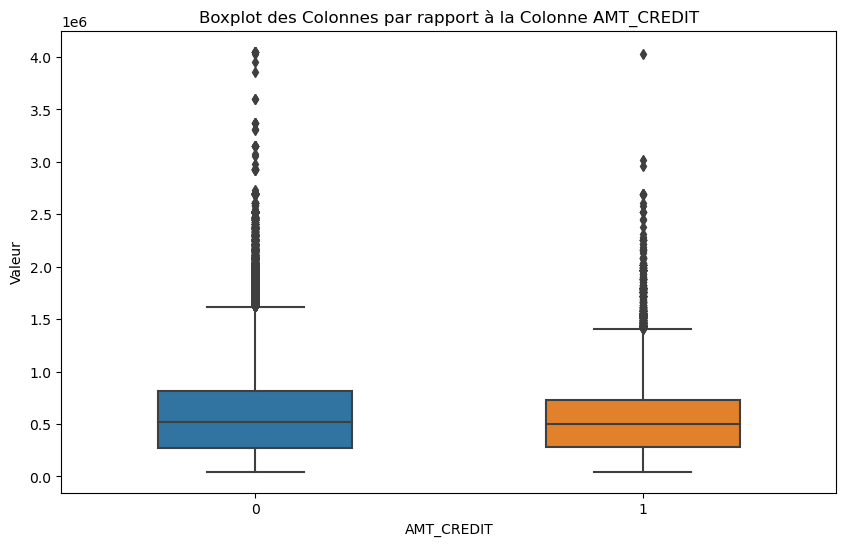

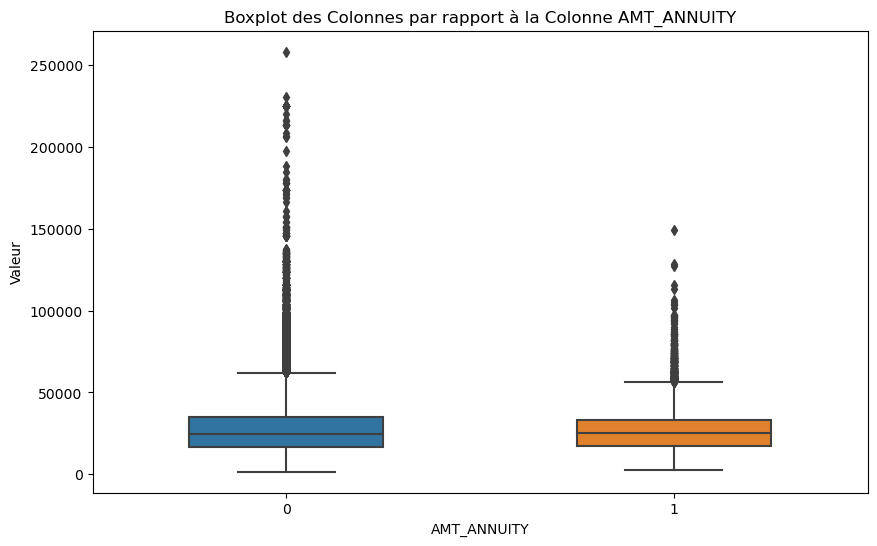

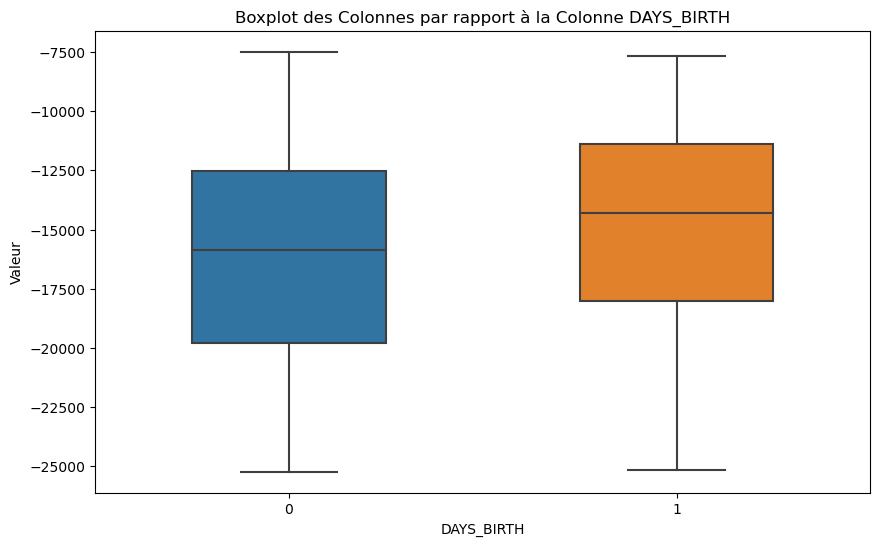

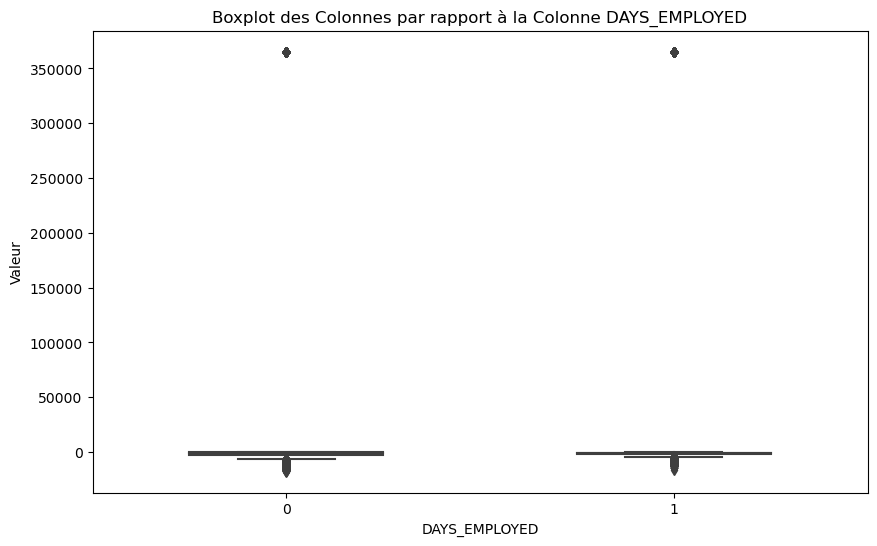

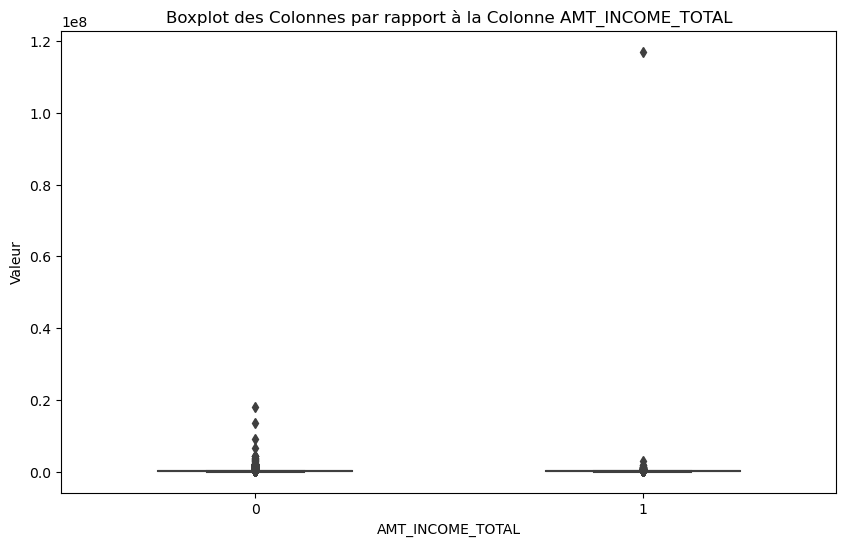

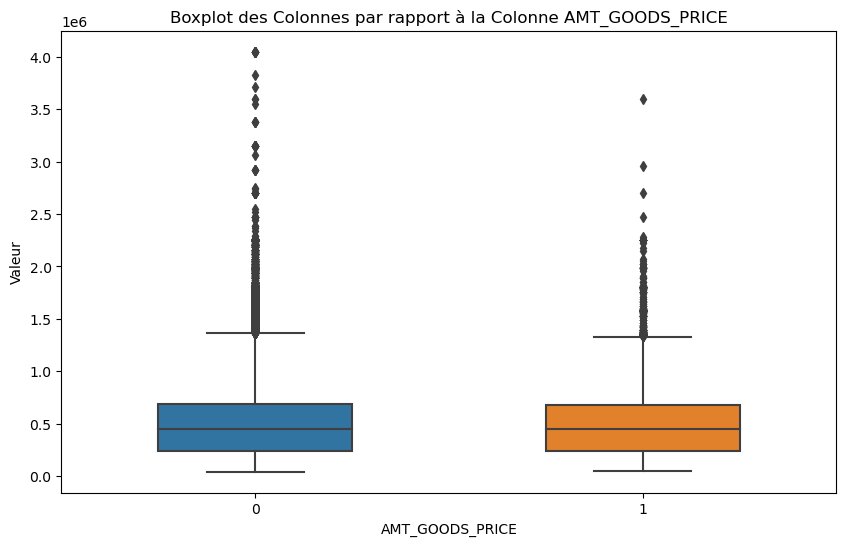

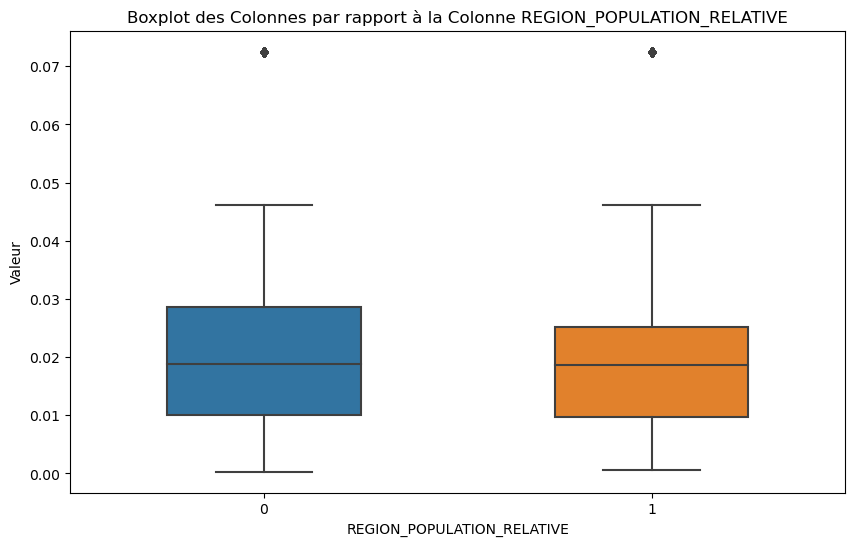

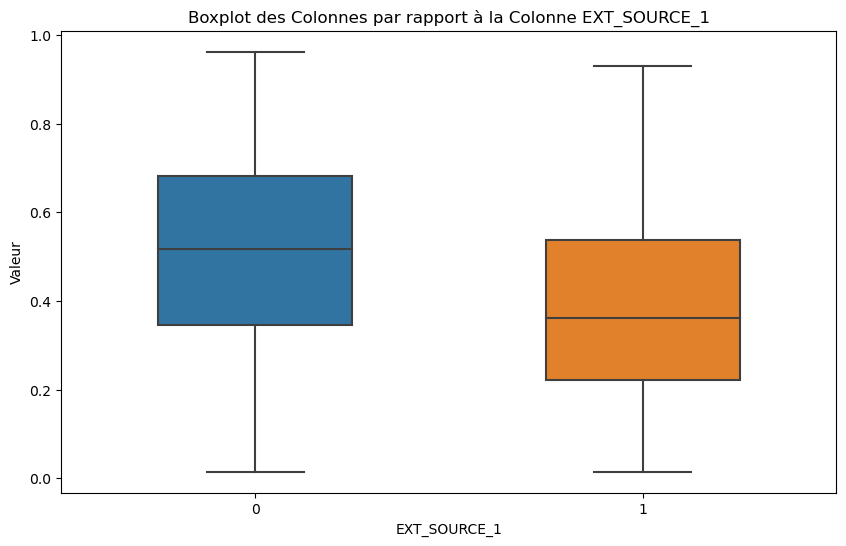

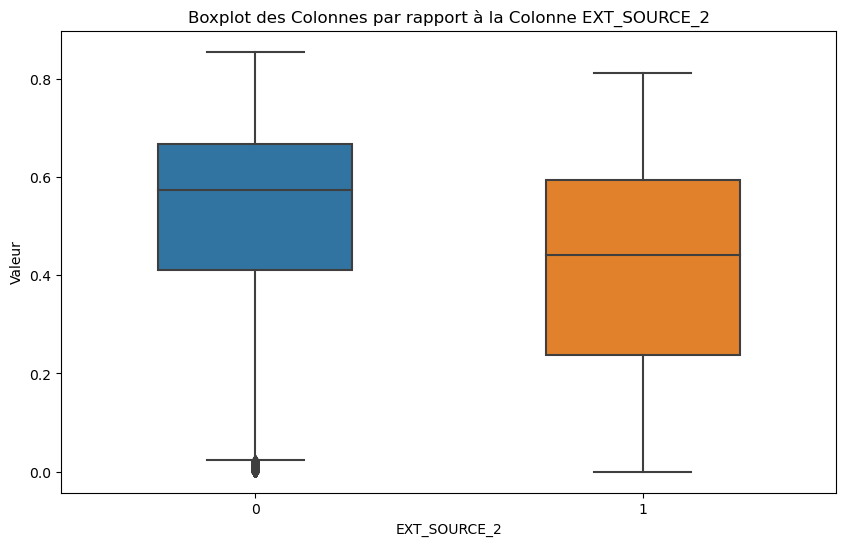

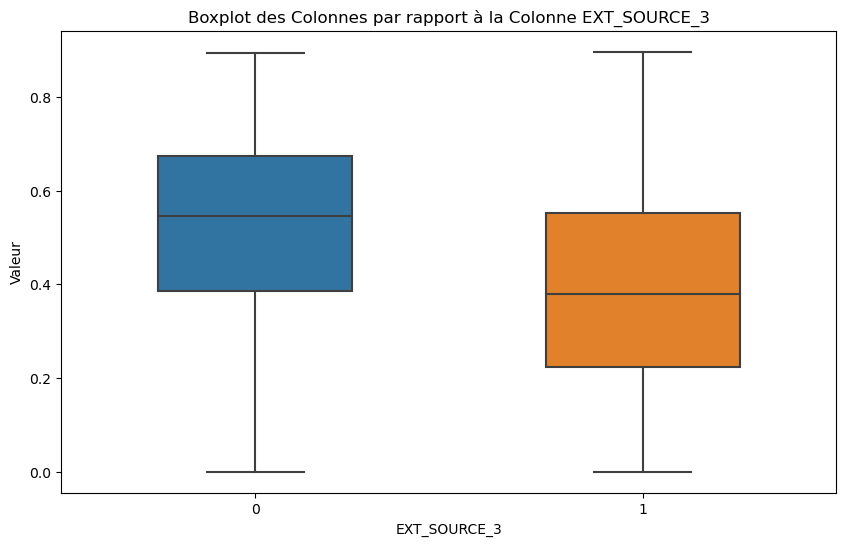

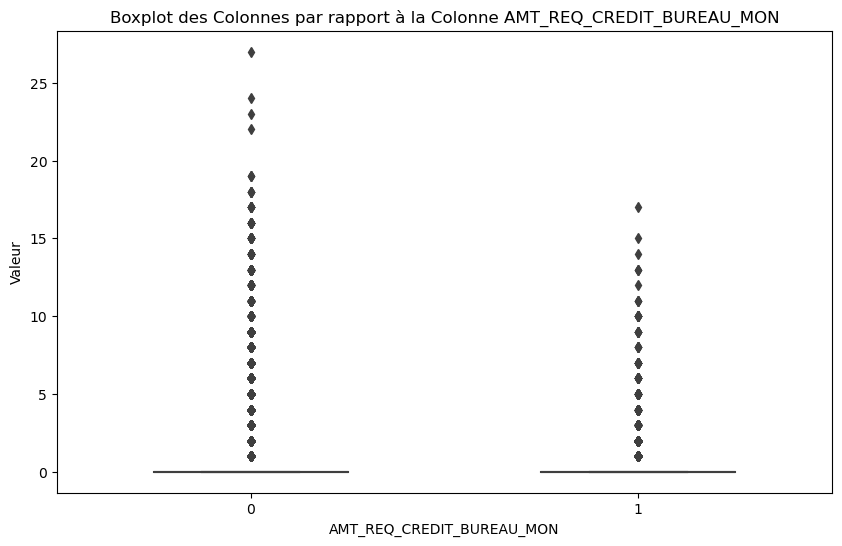

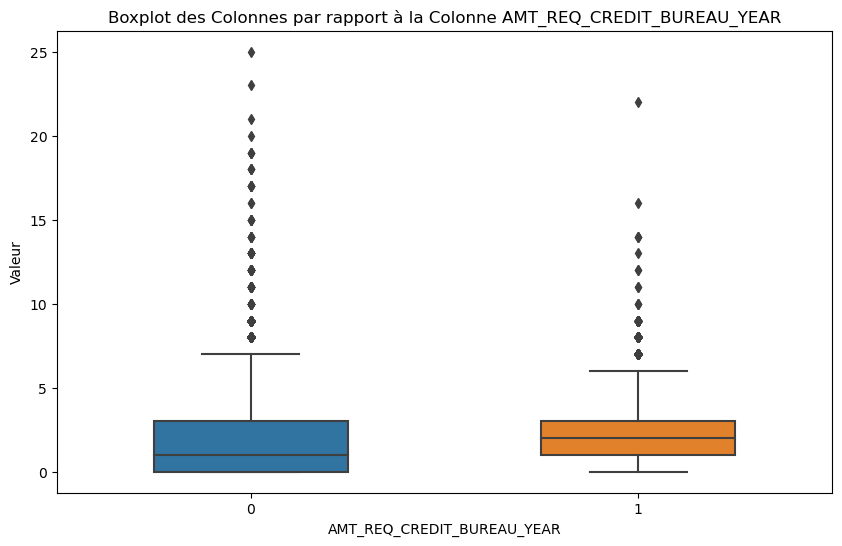

In [ ]:

for col in ['AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train, x='TARGET', y=col, width=0.5)
    plt.title(f'Boxplot des Colonnes par rapport à la Colonne {col}')
    plt.xlabel(col)
    plt.ylabel('Valeur')
    plt.show()

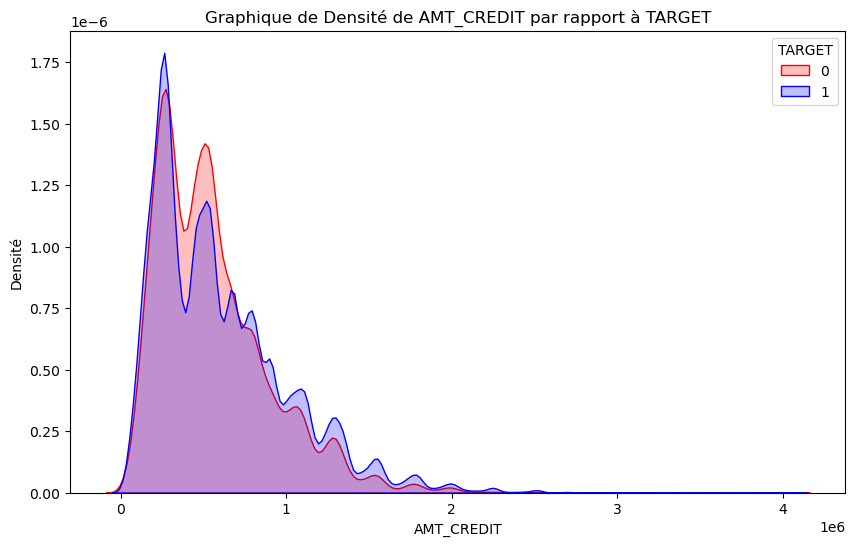

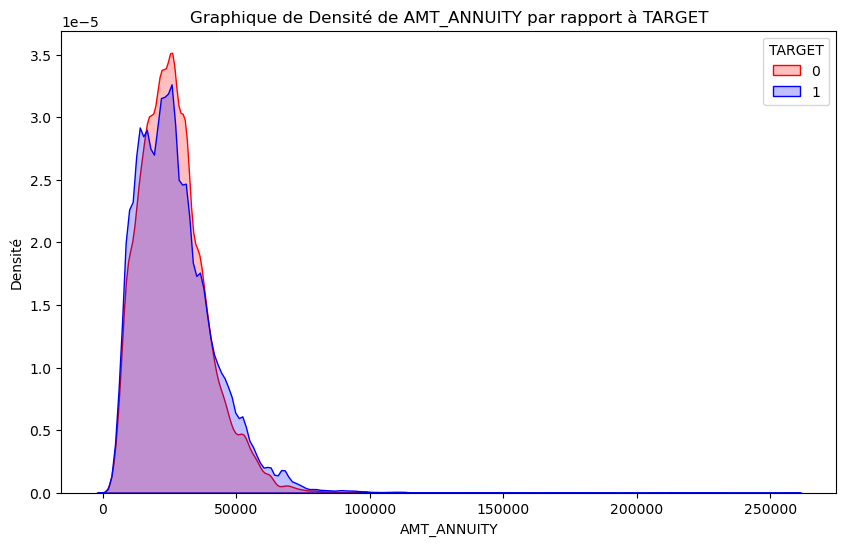

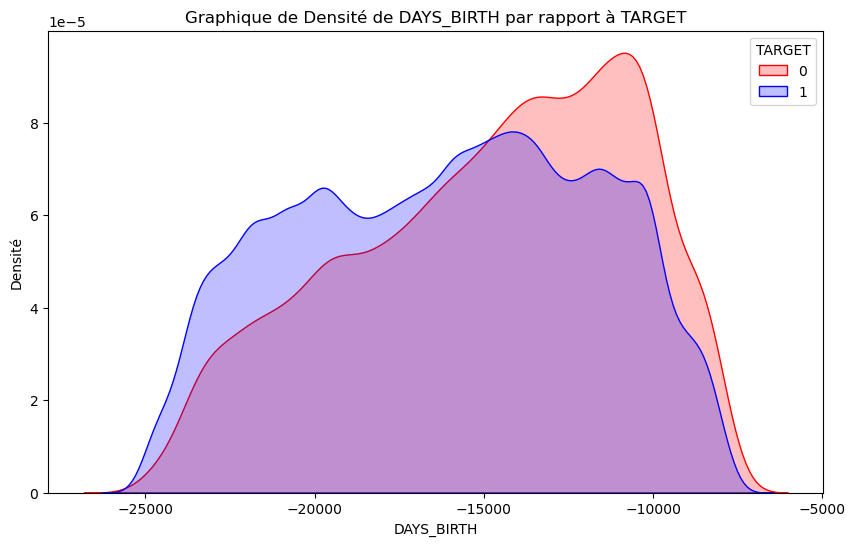

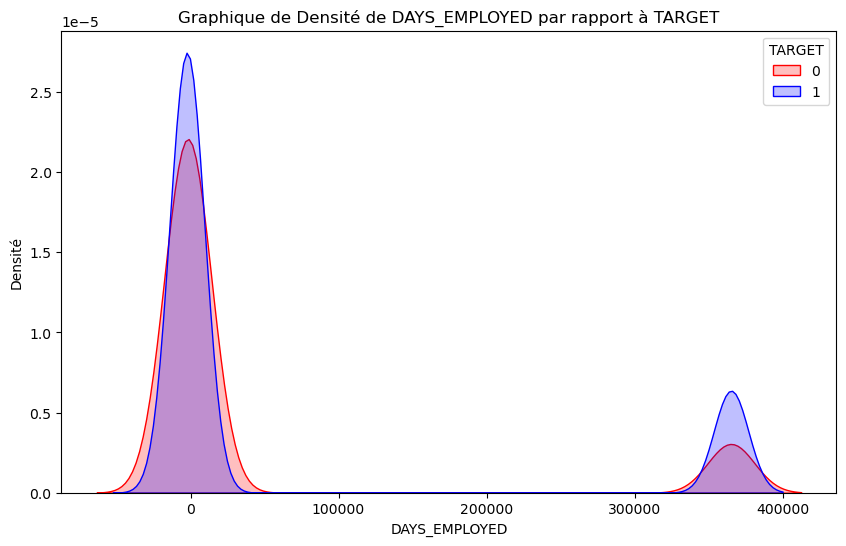

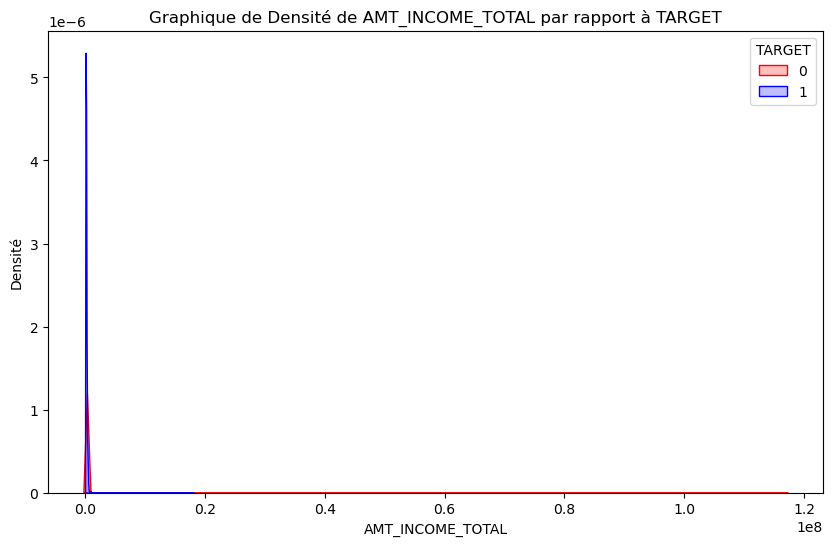

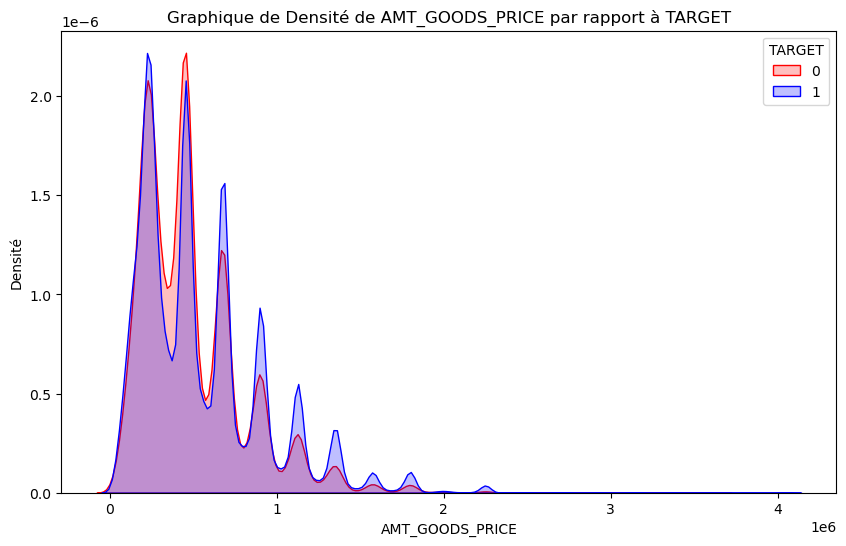

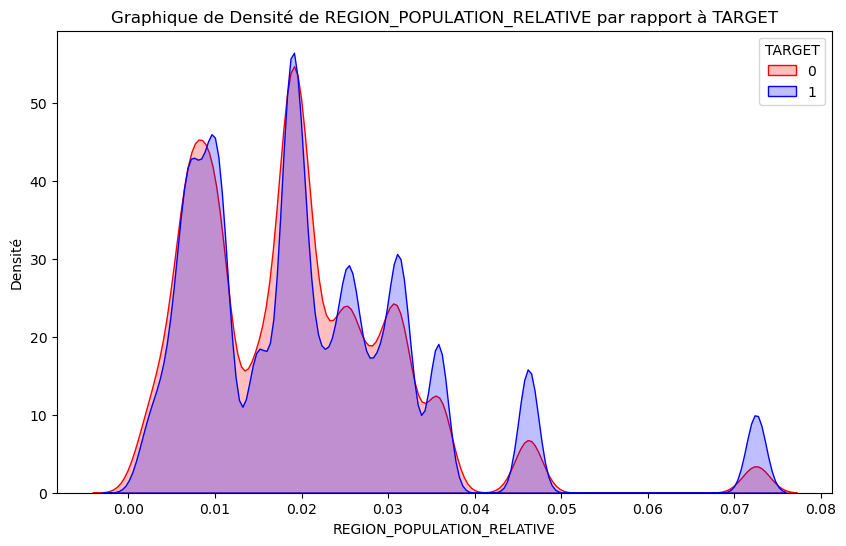

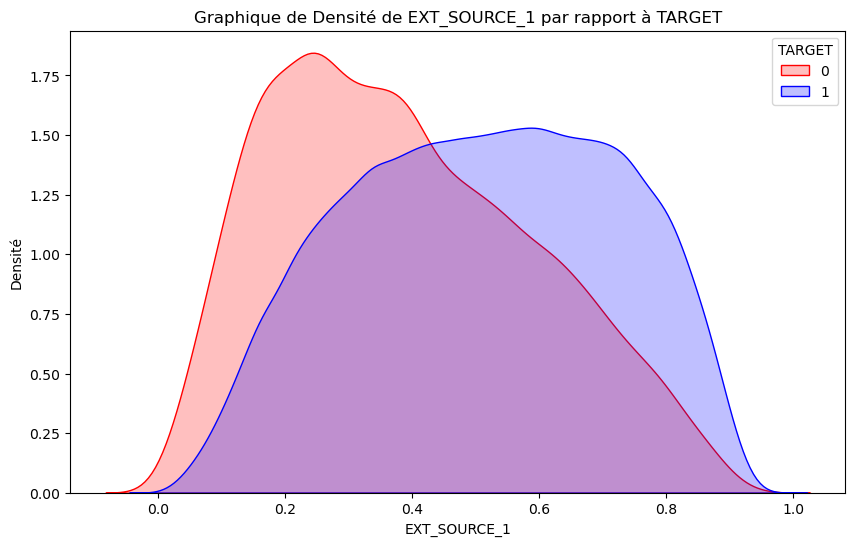

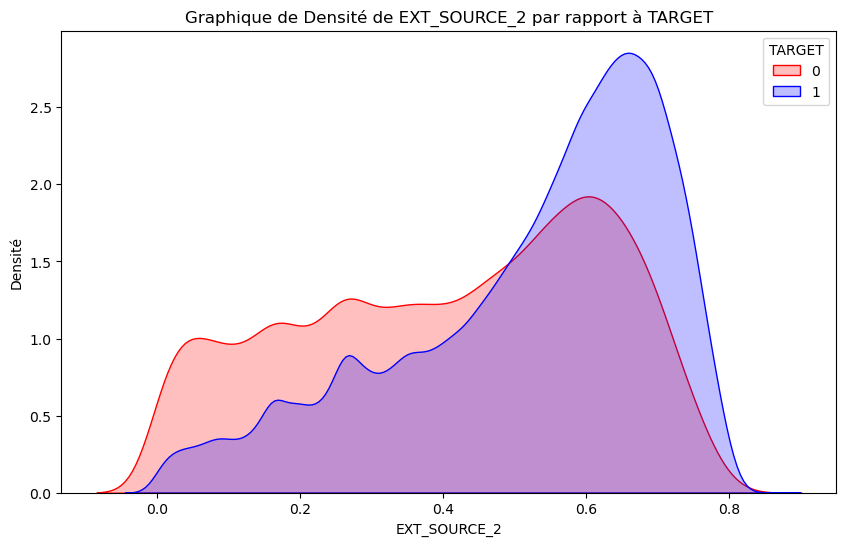

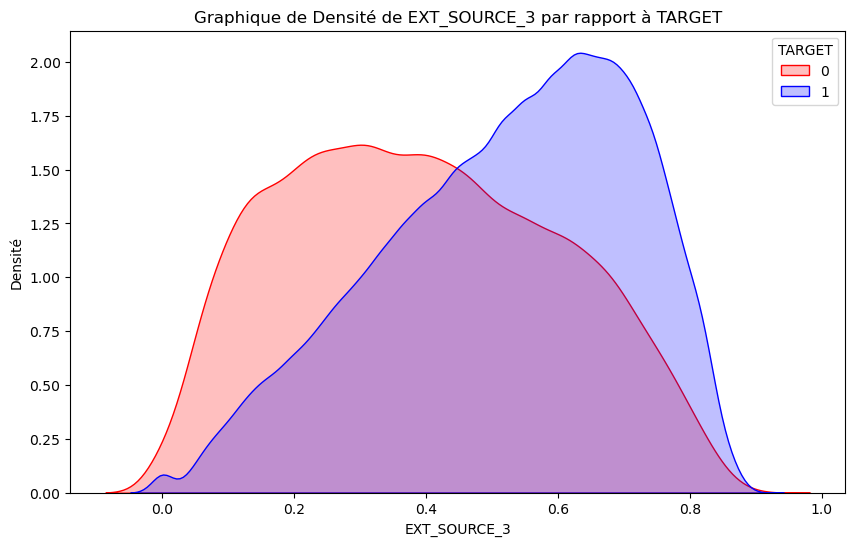

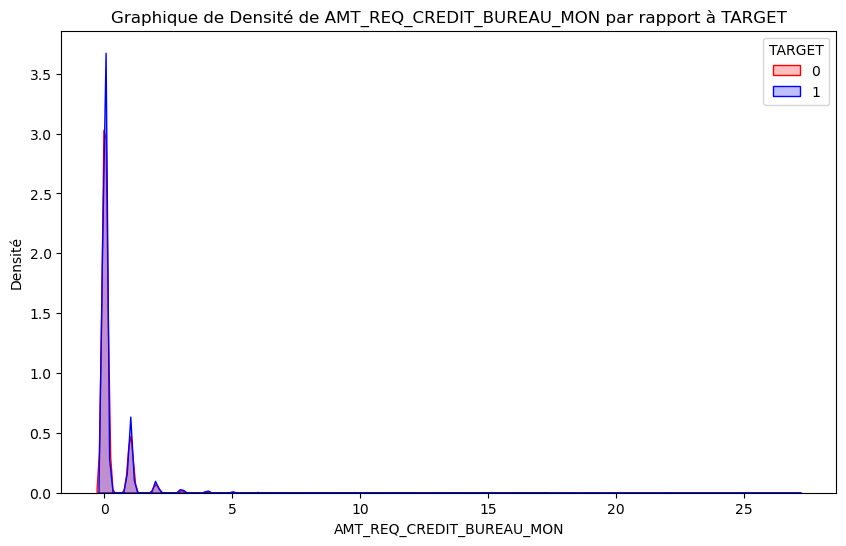

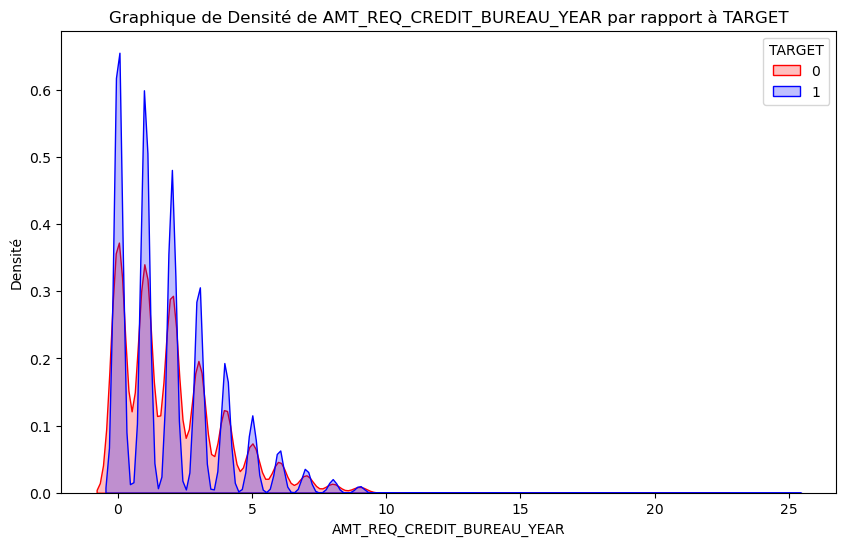

In [ ]:


cols_to_plot = [
    'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=train, x=col, hue='TARGET', common_norm=False, fill=True, palette=['blue', 'red'])
    plt.title(f'Graphique de Densité de {col} par rapport à TARGET')
    plt.xlabel(col)
    plt.ylabel('Densité')
    
    # Ajoutez une légende personnalisée
    legend_labels = {'blue': 0, 'red': 1}
    plt.legend(title='TARGET', labels=[legend_labels['blue'], legend_labels['red']], loc='upper right')
    
    plt.show()


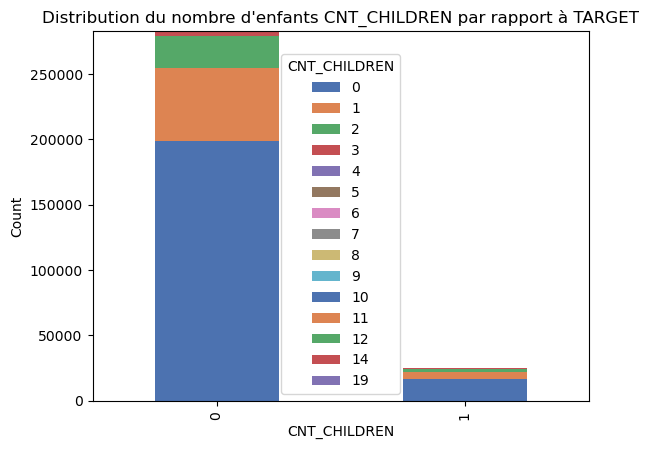

In [ ]:


col1 = 'TARGET'
col2 = 'CNT_CHILDREN'

counts = train.groupby([col1, col2]).size().unstack()
colors = sns.color_palette("deep", n_colors=len(train['CNT_CHILDREN'].unique()))

counts.plot(kind='bar', stacked=True, color=colors)
plt.title(f'Distribution du nombre d\'enfants {col2} par rapport à {col1}')
plt.xlabel(col2)
plt.ylabel('Count')
plt.show()


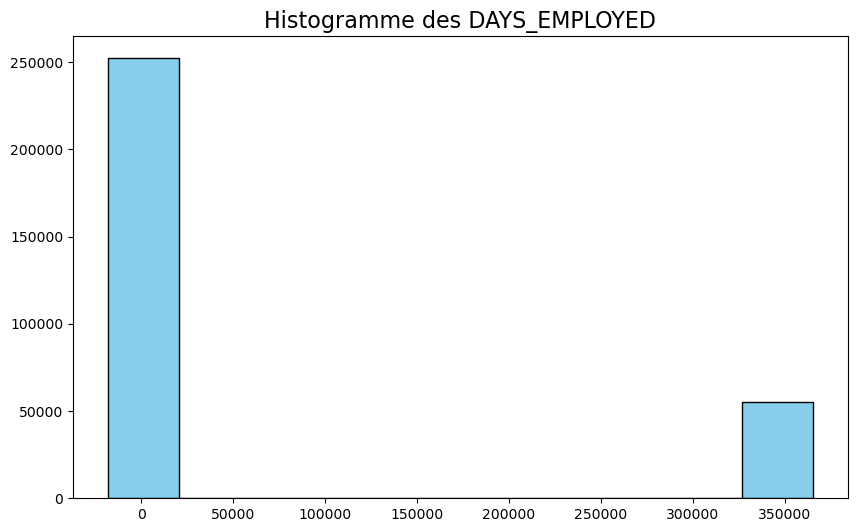

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
train[['DAYS_EMPLOYED']].hist(ax=ax, color='skyblue', edgecolor='black', grid=False)

plt.title('Histogramme des DAYS_EMPLOYED', fontsize=16)

plt.show() # DAYS_EMPLOYED

In [ ]:
train[['DAYS_EMPLOYED']].describe()

DAYS_EMPLOYED
count  307511.000000
mean    63815.045904
std    141275.766519
min    -17912.000000
25%     -2760.000000
50%     -1213.000000
75%      -289.000000
max    365243.000000

### correlation

In [ ]:
num=numeric_columns.drop(['SK_ID_CURR','CNT_CHILDREN','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'],axis=1)
mc_num=num.corr()

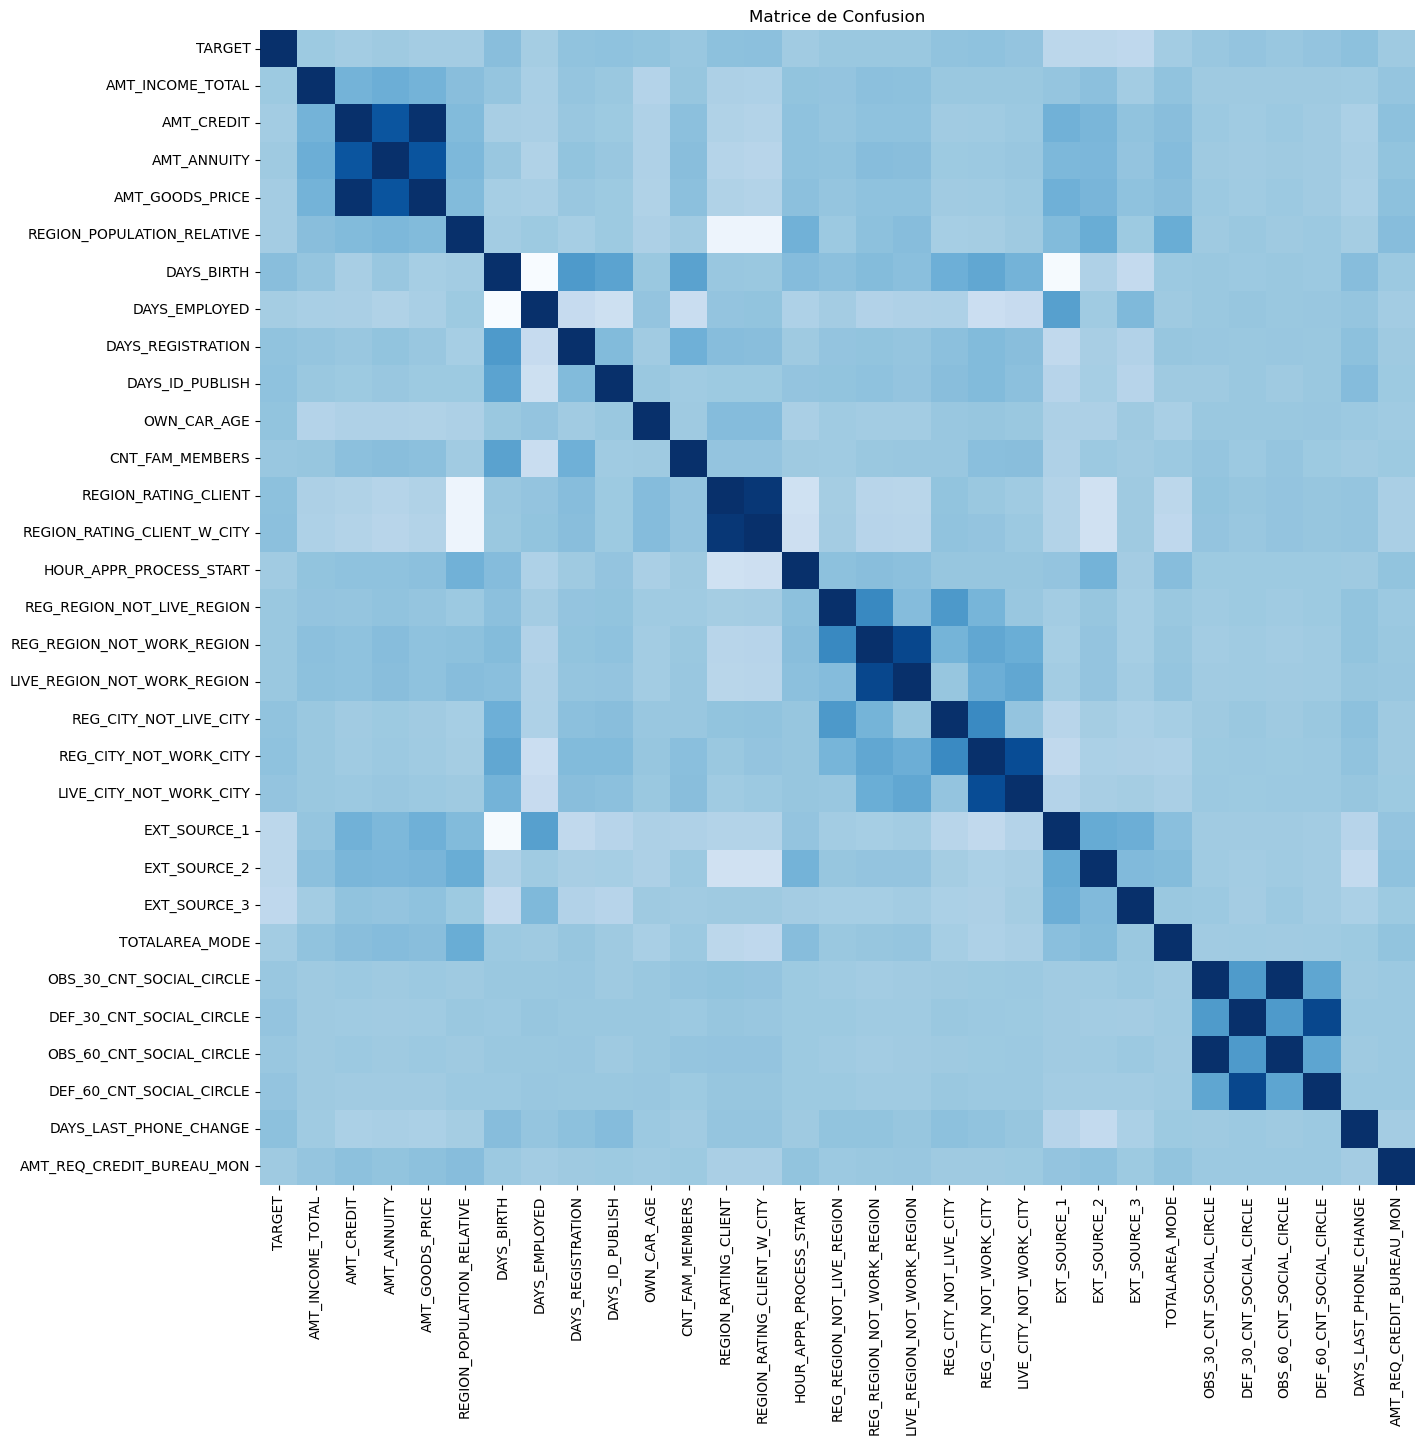

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(mc_num, annot=False, cmap='Blues', cbar=False, square=True)
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
# Tri des colonnes en fonction de la corrélation absolue avec la variable cible
correlation_with_target = mc_num['TARGET'].abs().sort_values(ascending=False)


In [ ]:
correlation_with_target

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
REGION_POPULATION_RELATIVE     0.037227
TOTALAREA_MODE                 0.032596
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
AMT_CREDIT                     0.030369
HOUR_APPR_PROCESS_START        0.024166
AMT_ANNUITY                    0.012817
AMT_REQ_CREDIT_BUREAU_MON      0.012462
CNT_FAM_MEMBERS                0.009308


In [ ]:
correlation_matrix = mc_num

# Trouver les paires de colonnes ayant une corrélation significative (vous pouvez ajuster le seuil)
seuil = 0.7  # Ajustez le seuil selon vos critères
correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > seuil:

            colname = correlation_matrix.columns[i]
            print(colname)

            correlated_columns.add(colname)

# Affichage des paires de colonnes les plus corrélées entre elles
print(correlated_columns)

AMT_ANNUITY
AMT_GOODS_PRICE
AMT_GOODS_PRICE
REGION_RATING_CLIENT_W_CITY
LIVE_REGION_NOT_WORK_REGION
LIVE_CITY_NOT_WORK_CITY
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
{'OBS_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT_W_CITY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY'}


In [ ]:
num=numeric_columns.drop(['SK_ID_CURR','CNT_CHILDREN','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1)
mc_num=num.corr()

In [ ]:
from sklearn.metrics import matthews_corrcoef



colonnes_entieres = numeric_columns.select_dtypes(include='int')
colonnes_entieres_corr=colonnes_entieres.drop(['SK_ID_CURR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1).corr(method=lambda x, y: matthews_corrcoef(x, y))

In [ ]:
correlation_matrix = colonnes_entieres_corr

# Trouver les paires de colonnes ayant une corrélation significative (vous pouvez ajuster le seuil)
seuil = 0.7  # Ajustez le seuil selon vos critères
correlated_columns2 = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > seuil:

            colname = correlation_matrix.columns[i]
            print(colname)

            correlated_columns2.add(colname)

# Affichage des paires de colonnes les plus corrélées entre elles
print(correlated_columns2)

REGION_RATING_CLIENT_W_CITY
LIVE_REGION_NOT_WORK_REGION
LIVE_CITY_NOT_WORK_CITY
{'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION'}


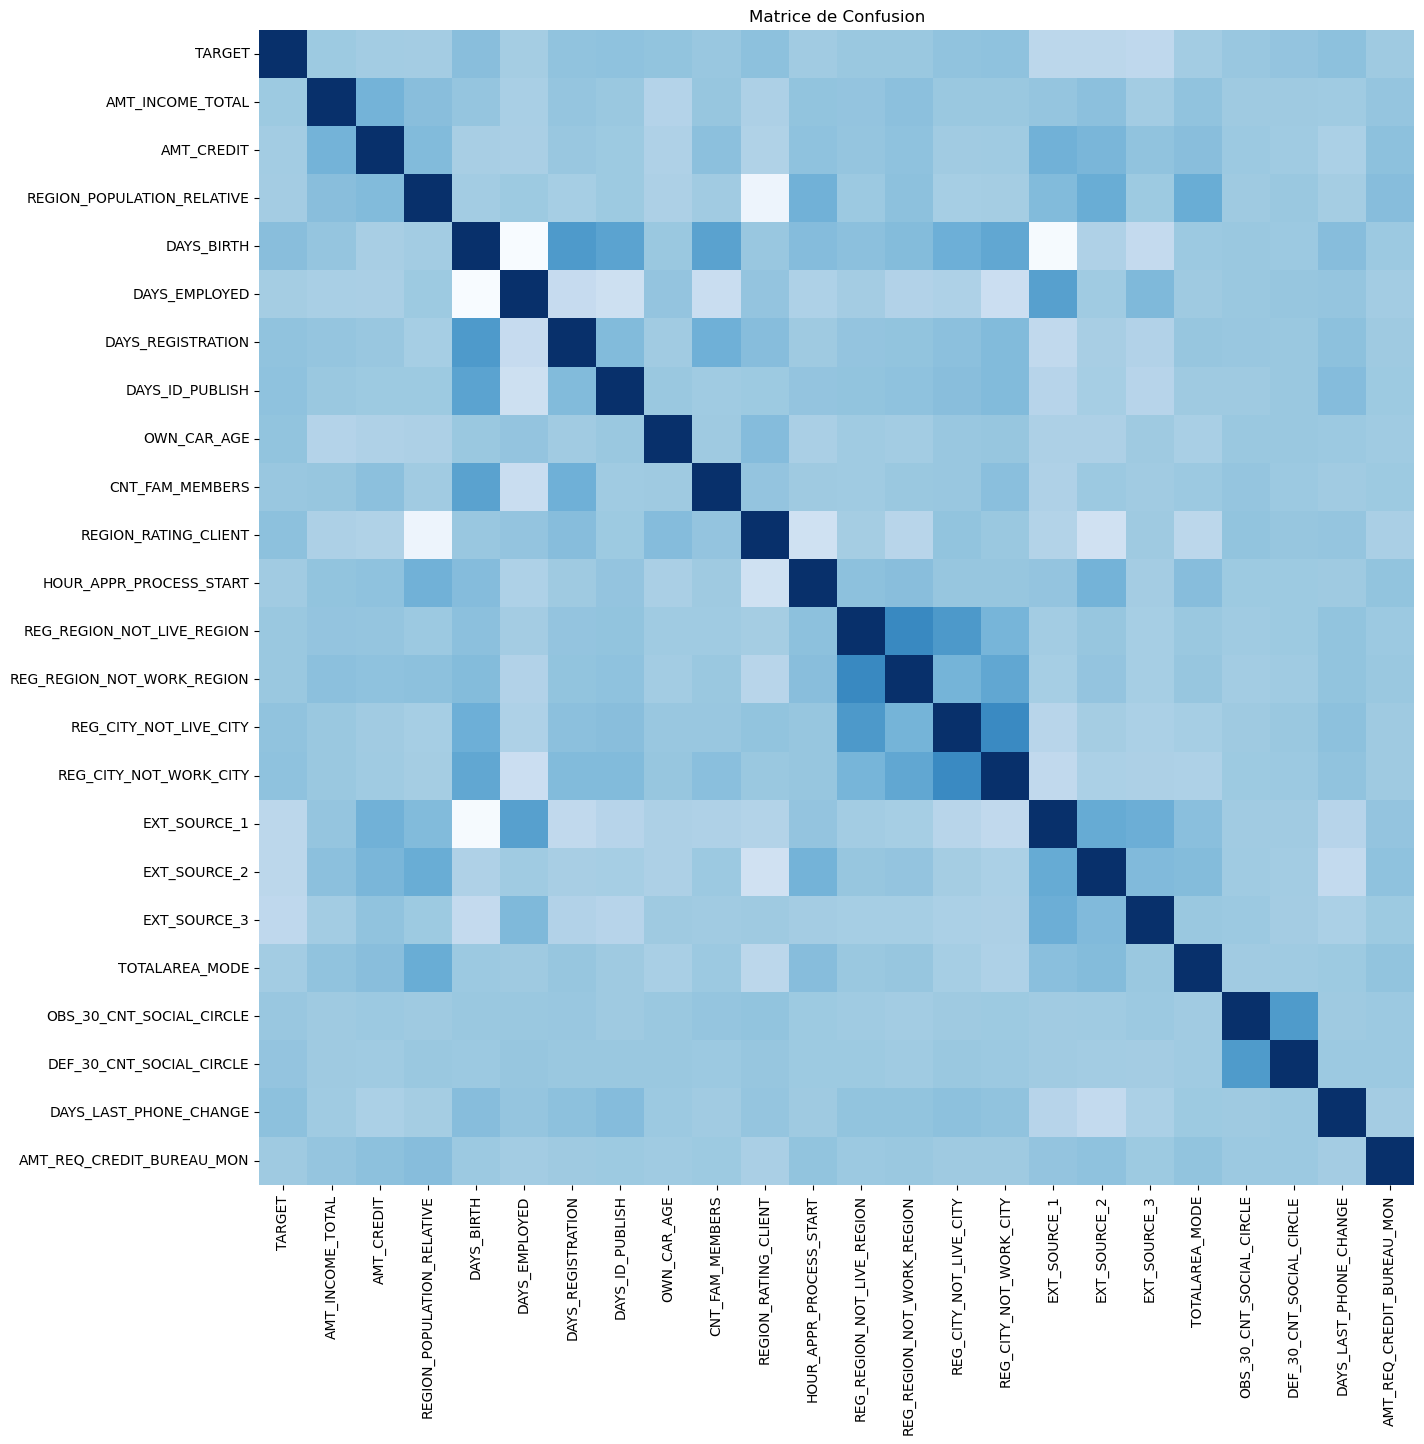

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(mc_num, annot=False, cmap='Blues', cbar=False, square=True)
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
EXT_SOURCE_TARGET=['EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']
train[EXT_SOURCE_TARGET].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [ ]:
AMT_REQ_CREDIT=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','TARGET']
train[AMT_REQ_CREDIT].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

# we should drop the AMT_REQ_CREDIT features because of they have no impact to the target and this may cause model missleading.



## colonnes categories

In [ ]:
train.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

In [ ]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

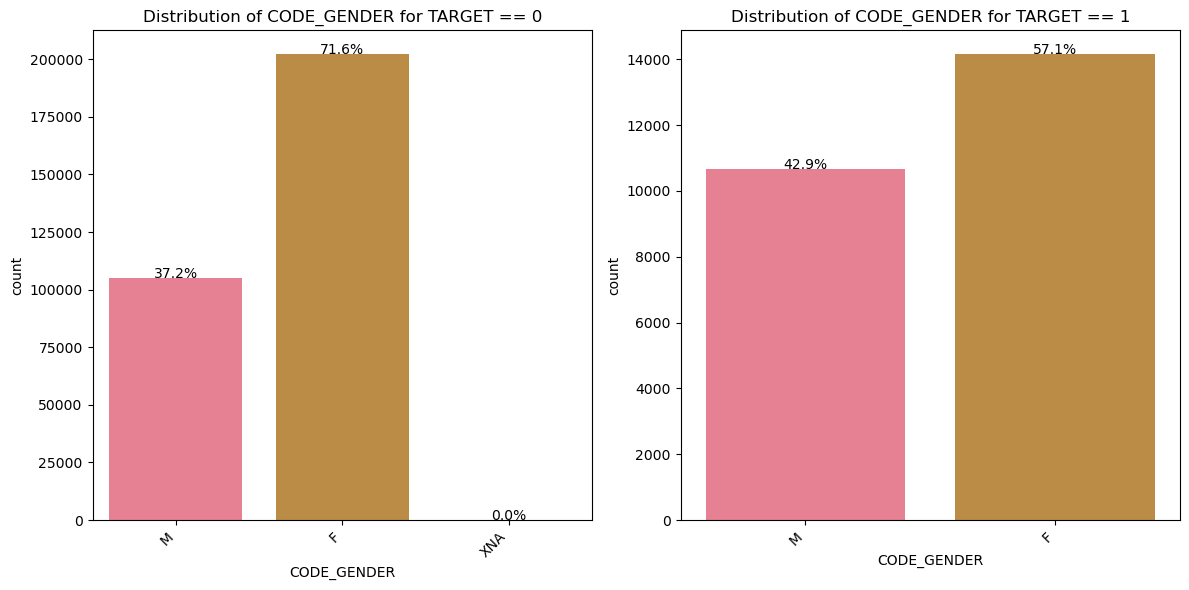

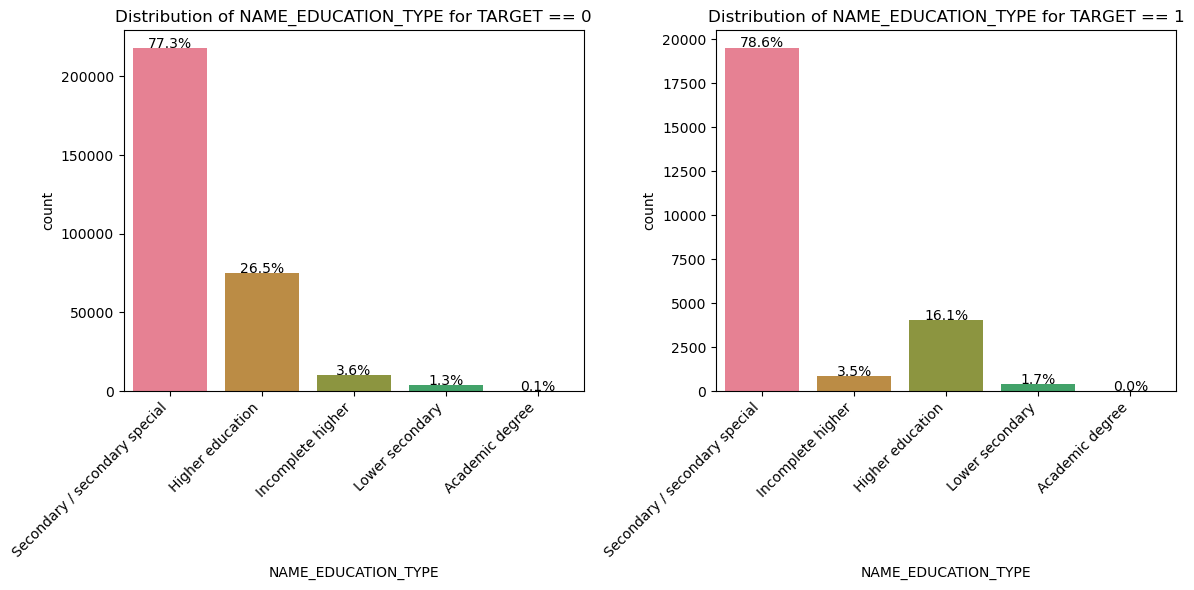

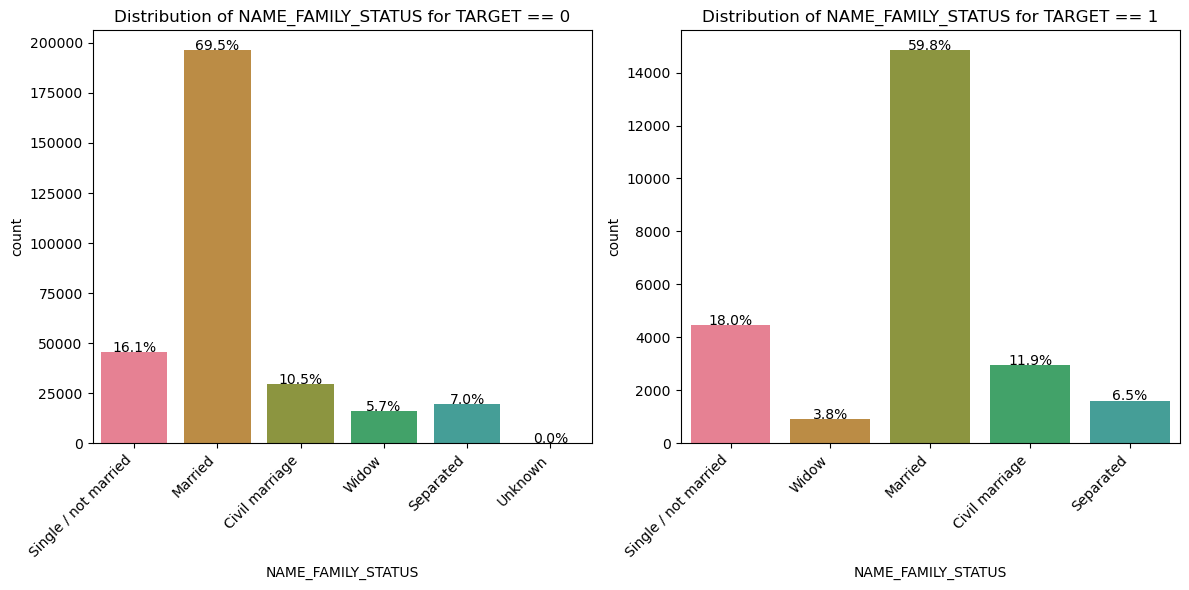

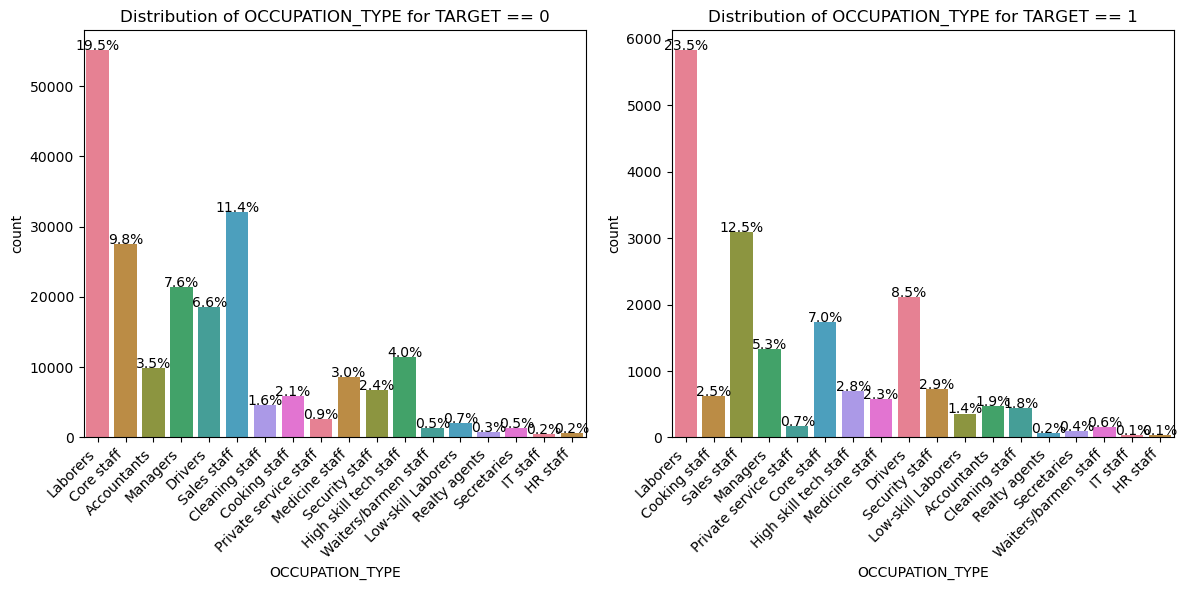

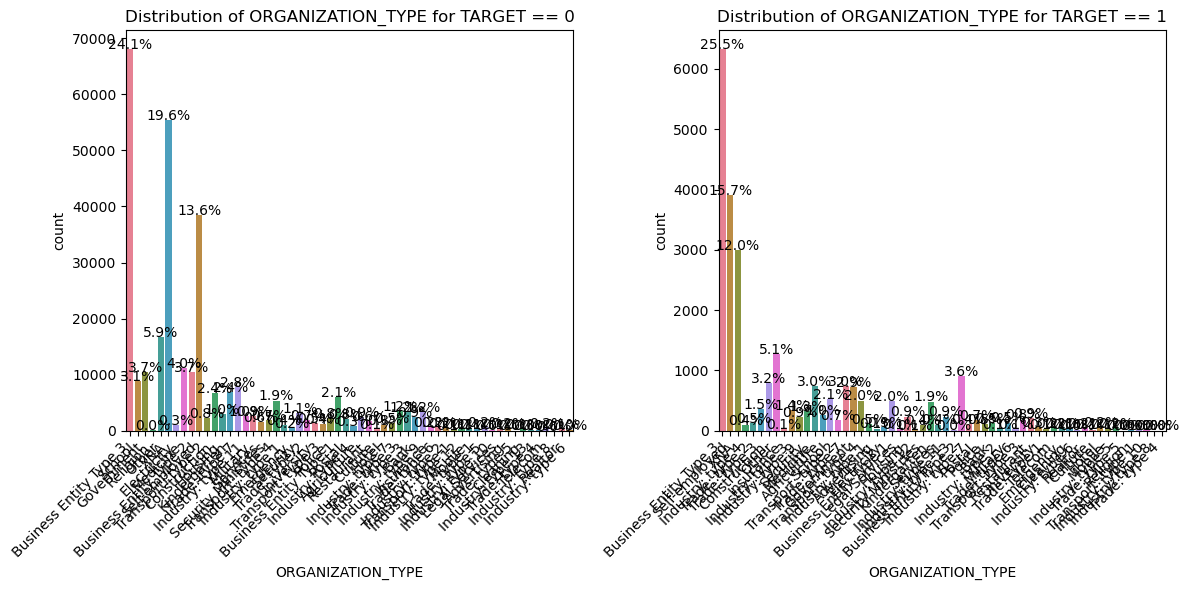

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir des couleurs vives personnalisées
colors = sns.color_palette("husl", 8)

cat_col = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

# Définir une palette globale
sns.set_palette("husl")

def cat_stats(df, features):
    for feature in features:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

        # Plot distribution for TARGET == 0 avec la palette spécifiée
        sns.countplot(x=feature, data=df, ax=ax1, palette=colors)
        ax1.set_title(f'Distribution of {feature} for TARGET == 0')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

        # Add percentage text to the bars
        total_0 = len(df[df['TARGET'] == 0])
        for p in ax1.patches:
            height = p.get_height()
            ax1.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total_0 * 100:.1f}%', ha='center')

        # Plot distribution for TARGET == 1 avec la palette spécifiée
        sns.countplot(x=feature, data=df[df['TARGET'] == 1], ax=ax2, palette=colors)
        ax2.set_title(f'Distribution of {feature} for TARGET == 1')
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

        # Add percentage text to the bars
        total_1 = len(df[df['TARGET'] == 1])
        for p in ax2.patches:
            height = p.get_height()
            ax2.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total_1 * 100:.1f}%', ha='center')

        plt.tight_layout()
        plt.show()

# Appeler la fonction avec l'ensemble de données et les colonnes catégorielles
cat_stats(train, cat_col)


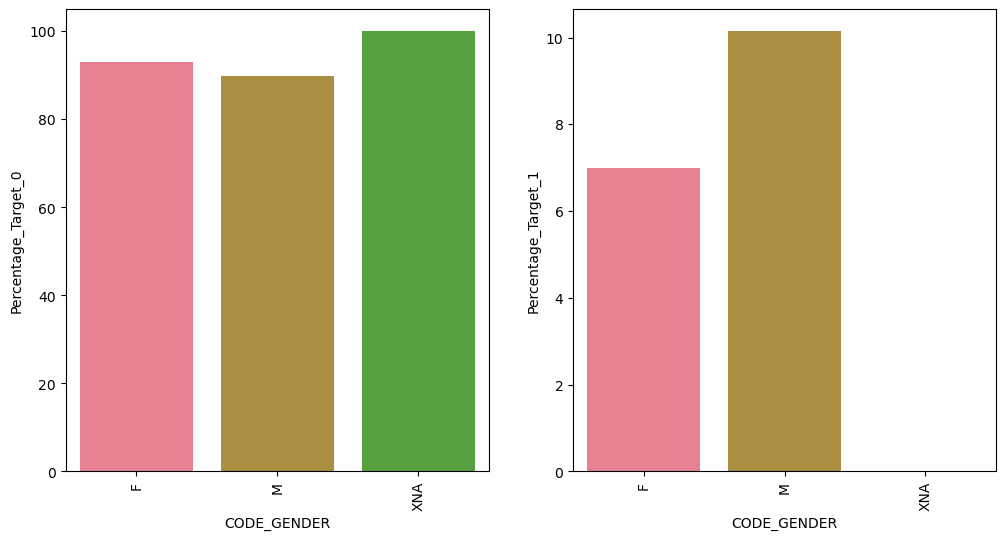

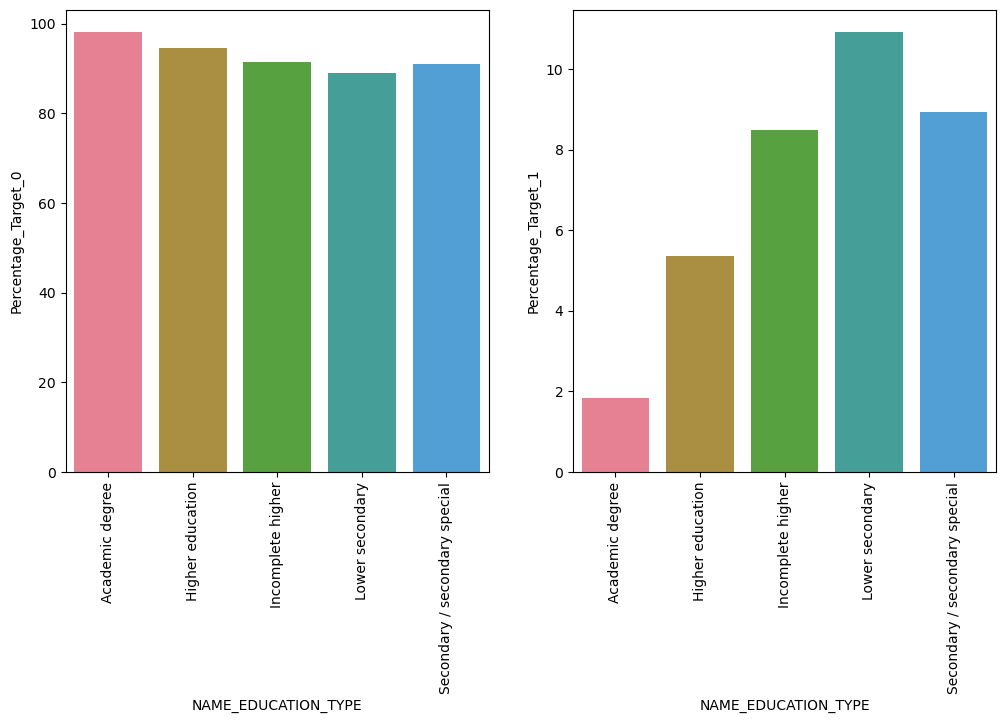

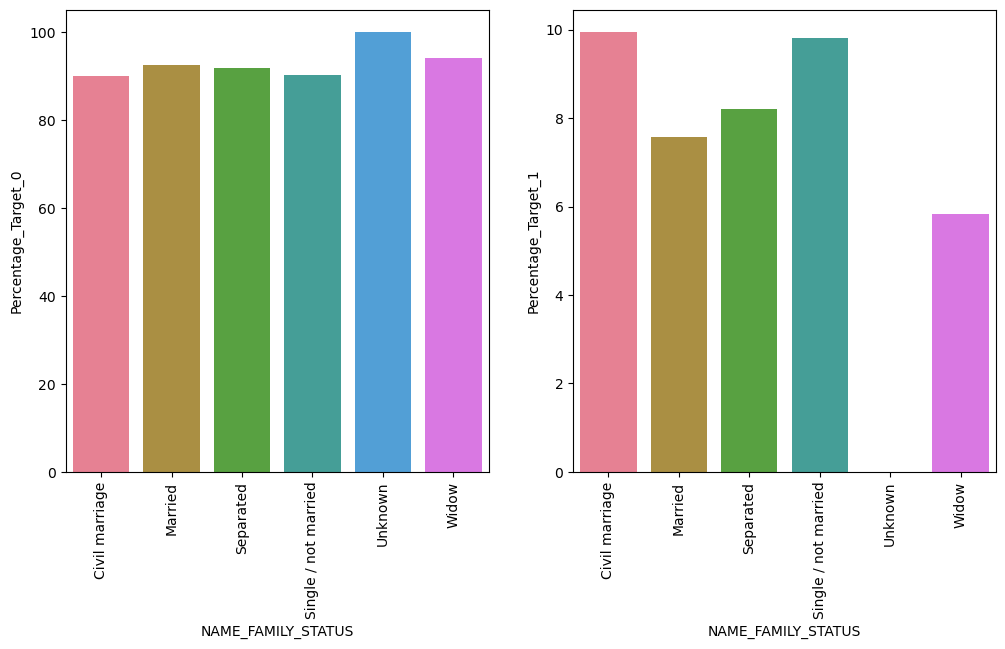

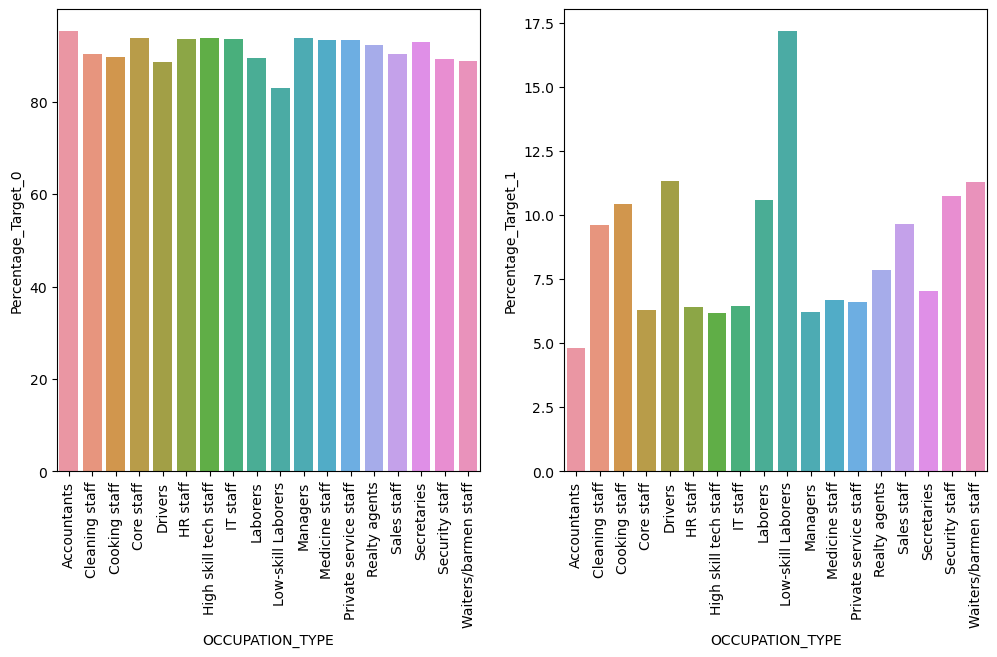

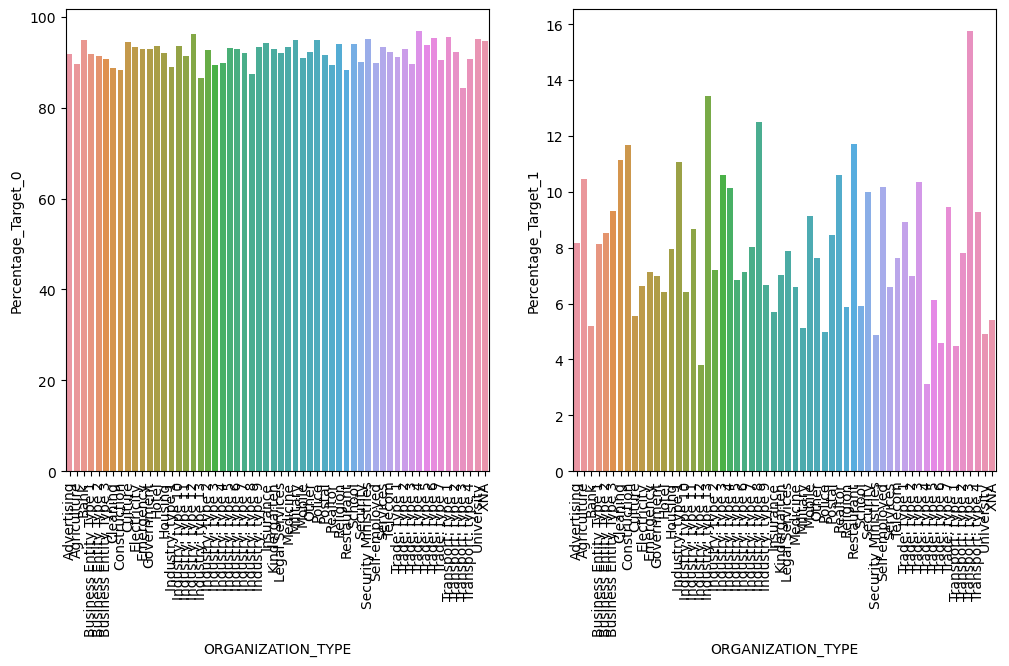

In [ ]:
cat_col=['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE',
'ORGANIZATION_TYPE']

def cat_stats(df, FEATURES):
    for feature in FEATURES:
        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
        cat_perc_0 = df[df['TARGET'] == 0].groupby(feature).size().reset_index(name='Count_Target_0')
        cat_perc_1 = df[df['TARGET'] == 1].groupby(feature).size().reset_index(name='Count_Target_1')
        cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
        cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc.sort_values(by=feature, inplace=True)
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
        
        sns.set_color_codes("pastel")
              # Plot distribution for TARGET == 0
        sns.barplot(ax=ax1, x=feature, y="Percentage_Target_0", data=cat_perc)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
        
        # Plot distribution for TARGET == 1
        sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
        
        
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.show()

cat_stats(train,cat_col)


In [ ]:
train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

## encodage colonnes categorielles, valeurs aberrantes

In [ ]:
(train['DAYS_EMPLOYED'] ).describe().round(2)


count    307511.00
mean      63815.05
std      141275.77
min      -17912.00
25%       -2760.00
50%       -1213.00
75%        -289.00
max      365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
(train['DAYS_EMPLOYED']/365 ).describe()


count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [ ]:
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [ ]:
print(train['CODE_GENDER'].unique())
print(test['CODE_GENDER'].unique())
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])

['M' 'F' 'XNA']
['F' 'M']


# fill nan values

In [ ]:
# Spécifiez le seuil de valeurs manquantes (70% dans cet exemple)
seuil = 0.7

# Calculez le nombre maximum de valeurs manquantes autorisé
max_missing_values = seuil * len(train)

# Supprimez les colonnes avec un nombre de valeurs manquantes supérieur au seuil
train_cleaned = train.dropna(thresh=max_missing_values, axis=1)

# Affichez le DataFrame résultant
train_cleaned

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [ ]:
train_cleaned.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [ ]:
train_cleaned.select_dtypes(include=['float64']).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
import pandas as pd

# Supposons que df est votre DataFrame

# Définissez une fonction pour détecter les outliers en utilisant la méthode IQR
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Appliquez la fonction aux colonnes numériques de votre DataFrame
numeric_columns = train_cleaned[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]
outliers_mask = numeric_columns.apply(detect_outliers)

# Combinez les masques pour détecter les lignes avec au moins un outlier
outliers_rows = outliers_mask.any(axis=1)

# Supprimez les lignes avec des outliers
train_no_outliers = train_cleaned[~outliers_rows]

# Affichez le DataFrame résultant



In [ ]:
train_no_outliers

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
5           27517.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307505      22050.0  ...                 0                0                0   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
5                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307505                0                        0.0                       0.0   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              0.0                        0.0   
5                              

In [ ]:
AMT_REQ_CREDIT=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']

train.drop(AMT_REQ_CREDIT,axis=1,inplace=True)
test.drop(AMT_REQ_CREDIT,axis=1,inplace=True)

In [ ]:
# https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script (il faut prendre ex sur celui la)




### fill nan values

In [ ]:

# Impute numerical features using median imputation
numeric_imputer = SimpleImputer(strategy='median')
numeric_features_train = train_no_outliers.select_dtypes(include='number')
imputed_numeric_features_train = numeric_imputer.fit_transform(numeric_features_train)

# Impute categorical features using most frequent imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_features_train = train_no_outliers.select_dtypes(exclude='number')
imputed_categorical_features_train = categorical_imputer.fit_transform(categorical_features_train)

# Concatenate the imputed features
features_train_imputed = pd.concat([pd.DataFrame(imputed_numeric_features_train, columns=numeric_features_train.columns),
                                    pd.DataFrame(imputed_categorical_features_train, columns=categorical_features_train.columns)],
                                   axis=1)

In [ ]:
# Impute numerical features using median imputation
numeric_imputer = SimpleImputer(strategy='median')
numeric_features_test = test.select_dtypes(include='number')
imputed_numeric_features_test = numeric_imputer.fit_transform(numeric_features_test)

# Impute categorical features using most frequent imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_features_test = test.select_dtypes(exclude='number')
imputed_categorical_features_test = categorical_imputer.fit_transform(categorical_features_test)

# Concatenate the imputed features
features_test_imputed = pd.concat([pd.DataFrame(imputed_numeric_features_test, columns=numeric_features_test.columns),
                                    pd.DataFrame(imputed_categorical_features_test, columns=categorical_features_test.columns)],
                                   axis=1)

In [ ]:
features_test_imputed

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0        100001.0           0.0          135000.0    568800.0      20560.5   
1        100005.0           0.0           99000.0    222768.0      17370.0   
2        100013.0           0.0          202500.0    663264.0      69777.0   
3        100028.0           2.0          315000.0   1575000.0      49018.5   
4        100038.0           1.0          180000.0    625500.0      32067.0   
...           ...           ...               ...         ...          ...   
48739    456221.0           0.0          121500.0    412560.0      17473.5   
48740    456222.0           2.0          157500.0    622413.0      31909.5   
48741    456223.0           1.0          202500.0    315000.0      33205.5   
48742    456224.0           0.0          225000.0    450000.0      25128.0   
48743    456250.0           0.0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850    -19241.0        -2329.0   
1             180000.0                    0.035792    -18064.0        -4469.0   
2             630000.0                    0.019101    -20038.0        -4458.0   
3            1575000.0                    0.026392    -13976.0        -1866.0   
4             625500.0                    0.010032    -13040.0        -2191.0   
...                ...                         ...         ...            ...   
48739         270000.0                    0.002042    -19970.0        -5169.0   
48740         495000.0                    0.035792    -11186.0        -1149.0   
48741         315000.0                    0.026392    -15922.0        -3037.0   
48742         450000.0                    0.018850    -13968.0        -2731.0   
48743         270000.0                    0.006629    -13962.0         -633.0   

       DAYS_REGISTRATION  ...            NAME_EDUCATION_TYPE  \
0                -5170.0  ...               Higher education   
1                -9118.0  ...  Secondary / secondary special   
2                -2175.0  ...               Higher education   
3                -2000.0  ...  Secondary / secondary special   
4                -4000.0  ...  Secondary / secondary special   
...                  ...  ...                            ...   
48739            -9094.0  ...  Secondary / secondary special   
48740            -3015.0  ...  Secondary / secondary special   
48741            -2681.0  ...  Secondary / secondary special   
48742            -1461.0  ...               Higher education   
48743            -1072.0  ...  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE     OCCUPATION_TYPE  \
0                 Married  House / apartment            Laborers   
1                 Married  House / apartment  Low-skill Laborers   
2                 Married  House / apartment             Drivers   
3                 Married  House / apartment         Sales staff   
4                 Married  House / apartment            Laborers   
...                   ...                ...                 ...   
48739               Widow  House / apartment            Laborers   
48740             Married  House / apartment         Sales staff   
48741             Married  House / apartment            Laborers   
48742             Married  House / apartment            Managers   
48743             Married  House / apartment          Core staff   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  FONDKAPREMONT_MODE  \
0                         TUESDAY            Kindergarten    reg oper account   
1                          FRIDAY           Self-employed    reg oper account   
2                          MONDAY       Transport: type 3    reg oper account   
3                       WEDNESDAY  Business Entity Type 3    reg oper account   
4                          FRIDAY  Business Entity Type 3    reg oper account   
...                      

### label encoder

In [ ]:
le = LabelEncoder()

# Ajustez l'encodeur sur l'ensemble d'entraînement
for col in features_train_imputed:
    if features_train_imputed[col].dtype == 'object':
        print(col)
        le.fit(features_train_imputed[col])
        features_train_imputed[col] = le.transform(features_train_imputed[col])
        features_test_imputed[col] = le.transform(features_test_imputed[col])


NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [ ]:
print(features_train_imputed.isna().sum().unique())
print(features_test_imputed.isna().sum().unique())

[0]
[0]


In [ ]:
# c'est ok de partir sur du label encoding et nonn du one hot (car trop lourd)
# faire encore du features engenering avec : https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script
# pipe modele
# lancement de mlflow
# eventuellment faire sur google  collab

------------

# Features engineering

In [ ]:
poly_features = features_train_imputed[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = features_test_imputed[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])


poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
poly_transformer.get_feature_names_out(input_features = [ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_2^3',
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH'], dtype=object)

In [ ]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out([ 'EXT_SOURCE_2', 
                                                                         'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3              -0.193243
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH   -0.179913
EXT_SOURCE_2^2 EXT_SOURCE_3            -0.174967
EXT_SOURCE_2 EXT_SOURCE_3^2            -0.172290
EXT_SOURCE_2                           -0.160221
EXT_SOURCE_2 DAYS_BIRTH                -0.155904
EXT_SOURCE_3                           -0.155002
EXT_SOURCE_2^2                         -0.148671
EXT_SOURCE_2^2 DAYS_BIRTH              -0.148054
EXT_SOURCE_3 DAYS_BIRTH                -0.148026
Name: TARGET, dtype: float64
EXT_SOURCE_3^2 DAYS_BIRTH   -0.140718
EXT_SOURCE_2^3              -0.138928
EXT_SOURCE_2 DAYS_BIRTH^2   -0.131702
EXT_SOURCE_3^3              -0.128070
EXT_SOURCE_3 DAYS_BIRTH^2   -0.124750
DAYS_BIRTH                  -0.076319
DAYS_BIRTH^2                -0.075304
DAYS_BIRTH^3                -0.073403
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


In [ ]:
poly_features_test = pd.DataFrame(poly_features_test, 
                             columns = poly_transformer.get_feature_names_out([ 'EXT_SOURCE_2', 
                                                                         'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [ ]:
features_train_imputed=pd.concat([features_train_imputed,poly_features[['EXT_SOURCE_2 EXT_SOURCE_3','EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH']]],axis=1)
features_test_imputed=pd.concat([features_test_imputed,poly_features_test[['EXT_SOURCE_2 EXT_SOURCE_3','EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH']]],axis=1)

In [ ]:
# Age Feature
features_train_imputed['AGE']=features_train_imputed['DAYS_BIRTH']/(365)
features_test_imputed['AGE']=features_test_imputed['DAYS_BIRTH']/(365)

features_train_imputed['YEARS_EMPLOYED']=features_train_imputed['DAYS_EMPLOYED']/(-365)
features_test_imputed['YEARS_EMPLOYED']=features_test_imputed['DAYS_EMPLOYED']/(-365)
# Generate DEBT_TO_INCOME_RATIO 

features_train_imputed['DEBT_TO_INCOME_RATIO'] = features_train_imputed['AMT_CREDIT'] / features_train_imputed['AMT_INCOME_TOTAL']
features_test_imputed['DEBT_TO_INCOME_RATIO'] = features_test_imputed['AMT_CREDIT'] / features_test_imputed['AMT_INCOME_TOTAL']

# Generate INCOME_TO_CREDIT 
features_train_imputed['INCOME_TO_CREDIT'] = features_train_imputed['AMT_INCOME_TOTAL'] / features_train_imputed['AMT_CREDIT']
features_test_imputed['INCOME_TO_CREDIT'] = features_test_imputed['AMT_INCOME_TOTAL'] / features_test_imputed['AMT_CREDIT']

In [ ]:
import gc


def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = dfs[2]
    bb = dfs[3]
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()

        # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()

        # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

In [ ]:
bureau=bureau_and_balance()

In [ ]:
bureau=bureau.reset_index()

In [ ]:
missings=bureau.loc[:,bureau.isna().mean() >= 0.6]
highly_missing_features = missings.columns
missings.columns



# Impute numerical features using mean imputation
numeric_imputer = SimpleImputer(strategy='median')
numeric_features_bureau = missings.select_dtypes(include='number')
imputed_numeric_features_bureau = numeric_imputer.fit_transform(numeric_features_bureau)
# numeric_features_test = test.select_dtypes(include='number')
# imputed_numeric_features_test = numeric_imputer.transform(numeric_features_test)

In [ ]:
bureau[numeric_features_bureau.columns] = numeric_imputer.fit_transform(bureau[numeric_features_bureau.columns])


In [ ]:
bureau=bureau[numeric_features_bureau.columns]

In [ ]:
bureau.isna().sum()

BURO_AMT_ANNUITY_MAX               0
BURO_AMT_ANNUITY_MEAN              0
ACTIVE_AMT_ANNUITY_MAX             0
ACTIVE_AMT_ANNUITY_MEAN            0
ACTIVE_MONTHS_BALANCE_MIN_MIN      0
ACTIVE_MONTHS_BALANCE_MAX_MAX      0
ACTIVE_MONTHS_BALANCE_SIZE_MEAN    0
CLOSED_AMT_ANNUITY_MAX             0
CLOSED_AMT_ANNUITY_MEAN            0
CLOSED_MONTHS_BALANCE_MIN_MIN      0
CLOSED_MONTHS_BALANCE_MAX_MAX      0
CLOSED_MONTHS_BALANCE_SIZE_MEAN    0
dtype: int64

In [ ]:
bureau

BURO_AMT_ANNUITY_MAX  BURO_AMT_ANNUITY_MEAN  ACTIVE_AMT_ANNUITY_MAX  \
0                    10822.5            3545.357143                 10822.5   
1                        0.0               0.000000                     0.0   
2                    13500.0            6516.000000                 13815.0   
3                    13500.0            6516.000000                 13815.0   
4                     4261.5            1420.500000                  4261.5   
...                      ...                    ...                     ...   
305806               13500.0            6516.000000                 13815.0   
305807              384147.0          154567.965000                 51799.5   
305808               58369.5           58369.500000                 58369.5   
305809                   0.0               0.000000                 13815.0   
305810                3244.5            1081.500000                  3244.5   

        ACTIVE_AMT_ANNUITY_MEAN  ACTIVE_MONTHS_BALANCE_MIN_MIN  \
0                     8272.5000                          -18.0   
1                        0.0000                          -34.0   
2                    10167.3750                          -25.0   
3                    10167.3750                          -25.0   
4                     2130.7500                           -4.0   
...                         ...                            ...   
305806               10167.3750                          -25.0   
305807               39778.4475                          -27.0   
305808               58369.5000                          -30.0   
305809               10167.3750                          -25.0   
305810                 811.1250                          -33.0   

        ACTIVE_MONTHS_BALANCE_MAX_MAX  ACTIVE_MONTHS_BALANCE_SIZE_MEAN  \
0                                 0.0                        10.666667   
1                                 0.0                        10.000000   
2                                 0.0                        16.000000   
3                                 0.0                        16.000000   
4                                 0.0                         4.000000   
...                               ...                              ...   
305806                            0.0                        16.000000   
305807                            0.0                        27.000000   
305808                            0.0                        27.500000   
305809                            0.0                        16.000000   
305810                            0.0                        18.600000   

        CLOSED_AMT_ANNUITY_MAX  CLOSED_AMT_ANNUITY_MEAN  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   
...                        ...                      ...   
305806                     0.0                      0.0   
305807                384147.0                 384147.0   
305808                 58369.5                  58369.5   
305809                     0.0                      0.0   
305810                  3244.5                   1297.8   

        CLOSED_MONTHS_BALANCE_MIN_MIN  CLOSED_MONTHS_BALANCE_MAX_MAX  \
0                               -51.0                            0.0   
1                               -47.0                            0.0   
2                               -62.0                            0.0   
3                               -62.0                            0.0   
4                               -12.0                            0.0   
...                               ...                            ...   
305806                          -62.0                            0.0   
305807                          -32.0                            0.0   
305808              

In [ ]:
features_train_imputed.join(bureau, how='inner', on='SK_ID_CURR').isna().sum()

SK_ID_CURR                         0
TARGET                             0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
                                  ..
CLOSED_AMT_ANNUITY_MAX             0
CLOSED_AMT_ANNUITY_MEAN            0
CLOSED_MONTHS_BALANCE_MIN_MIN      0
CLOSED_MONTHS_BALANCE_MAX_MAX      0
CLOSED_MONTHS_BALANCE_SIZE_MEAN    0
Length: 90, dtype: int64

In [ ]:
train=features_train_imputed.join(bureau, how='inner', on='SK_ID_CURR')
test=features_test_imputed.join(bureau, how='inner', on='SK_ID_CURR')


In [ ]:
train['TARGET'].unique()

array([0., 1.])

In [ ]:
#test.drop(['SK_ID_CURR'],axis=1,inplace=True)
train.drop(['SK_ID_CURR'],axis=1,inplace=True)

In [ ]:
# Aggregating the 20 flag document features into a single feature by summing the number of flag documents per applicant can be a useful approach. By creating a new aggregated feature, we can capture the overall count or presence of flag documents for each applicant and reduce sparsity of the data, which may provide valuable information for the analysis or modeling task.



FLAG_DOCUMENT=['FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']
train['FLAG_DOCUMENT']=train[FLAG_DOCUMENT].sum(axis=1)
test['FLAG_DOCUMENT']=test[FLAG_DOCUMENT].sum(axis=1)
train.drop(FLAG_DOCUMENT,axis=1,inplace=True)
test.drop(FLAG_DOCUMENT,axis=1,inplace=True)

In [ ]:
common_columns = list(train.columns.intersection(test.columns))

# Extraire les colonnes communes dans les deux DataFrames
taget=train['TARGET']
train_common = train[common_columns].copy()
test_common = test[common_columns].copy()


In [ ]:
test_common['SK_ID_CURR']=test['SK_ID_CURR']

In [ ]:
train_common['TARGET']=taget

In [ ]:
test_common

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               0.0          135000.0    568800.0      20560.5   
1               0.0           99000.0    222768.0      17370.0   
2               0.0          202500.0    663264.0      69777.0   
3               2.0          315000.0   1575000.0      49018.5   
4               1.0          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
28201           1.0          180000.0    270000.0      21460.5   
28202           0.0          117000.0    124380.0      12114.0   
28203           0.0          202500.0    904500.0      32616.0   
28204           0.0          144000.0    202500.0      20880.0   
28205           0.0           99000.0    847723.5      30577.5   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850    -19241.0        -2329.0   
1             180000.0                    0.035792    -18064.0        -4469.0   
2             630000.0                    0.019101    -20038.0        -4458.0   
3            1575000.0                    0.026392    -13976.0        -1866.0   
4             625500.0                    0.010032    -13040.0        -2191.0   
...                ...                         ...         ...            ...   
28201         270000.0                    0.026392     -9775.0        -1755.0   
28202         112500.0                    0.005144    -16250.0        -4816.0   
28203         904500.0                    0.003541    -18157.0        -4596.0   
28204         202500.0                    0.006207    -22160.0        -1765.0   
28205         715500.0                    0.030755    -13729.0        -4131.0   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  ACTIVE_MONTHS_BALANCE_MIN_MIN  \
0                -5170.0           -812.0  ...                          -53.0   
1                -9118.0          -1623.0  ...                          -25.0   
2                -2175.0          -3503.0  ...                          -25.0   
3                -2000.0          -4208.0  ...                          -48.0   
4                -4000.0          -4262.0  ...                          -25.0   
...                  ...              ...  ...                            ...   
28201            -4122.0          -2297.0  ...                          -21.0   
28202            -6788.0          -2965.0  ...                          -25.0   
28203            -5275.0          -1698.0  ...                          -25.0   
28204           -11499.0          -4933.0  ...                          -25.0   
28205             -394.0          -4476.0  ...                          -25.0   

       ACTIVE_MONTHS_BALANCE_MAX_MAX  ACTIVE_MONTHS_BALANCE_SIZE_MEAN  \
0                                0.0                        28.666667   
1                                0.0                        16.000000   
2                                0.0                        16.000000   
3                                0.0                        23.750000   
4                                0.0                        16.000000   
...                              ...                              ...   
28201                            0.0                        16.500000   
28202                            0.0                        16.000000   
28203                            0.0                        16.250000   
28204                            0.0                        16.000000   
28205                            0.0                        16.000000   

       CLOSED_AMT_ANNUITY_MAX  CLOSED_AMT_ANNUITY_MEAN  \
0                     29700.0                 29700.00   
1                         0.0                     0.00   
2                         0.0                     0.00   
3                    125091.0                 80365.50   
4                         0.0                     0.00   
...                       ...              

In [ ]:
test_common.reset_index().drop(['index'],axis=1).to_csv('test_v2.csv',index=False)
train_common.reset_index().drop(['index'],axis=1).to_csv('train_v2.csv',index=False)

# EDA

In [ ]:
import joblib
import numpy as np
import pandas as pd
# Charger le modèle pickle (assurez-vous d'avoir un modèle pickle à utiliser)
model = joblib.load(r'C:\Users\Hilbert\Documents\OpenClassRoom\Projet_7\app_projet7\app\model\regression_logistique_model_v2.pkl')
data=pd.read_csv(r'C:\Users\Hilbert\Documents\OpenClassRoom\Projet_7\test_v2.csv')

model.predict(data[data['SK_ID_CURR'] == 305776.0].iloc[:, :-1])[0]

0.0

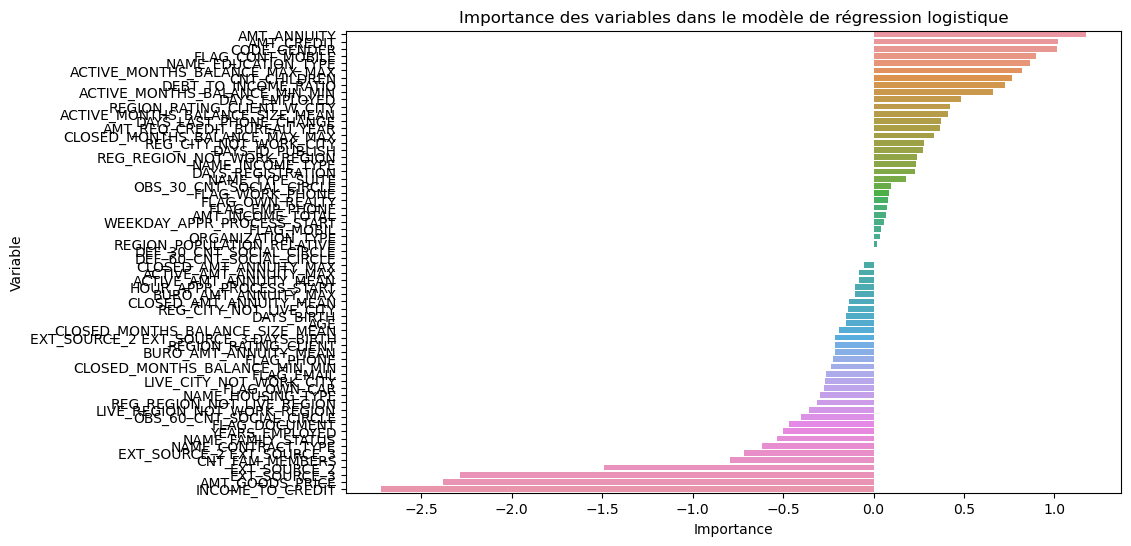

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

logistic_classifier = model.named_steps['m']

# Obtenir les coefficients du classificateur logistique
coefficients = logistic_classifier.coef_[0]

# Créer un dataframe avec les noms des variables et leur importance
df = pd.DataFrame({'Variable': data.iloc[:, :-1].columns, 'Importance': coefficients})

# Trier le dataframe par ordre d'importance décroissante
df = df.sort_values(by='Importance', ascending=False)

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=df)
plt.title('Importance des variables dans le modèle de régression logistique')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

logistic_classifier = model.named_steps['m']

# Obtenir les coefficients du classificateur logistique
coefficients = logistic_classifier.coef_[0]

# Créer un dataframe avec les noms des variables et leur importance
df = pd.DataFrame({'Variable': data.iloc[:, :-1].columns, 'Importance': coefficients})

# Trier le dataframe par ordre d'importance décroissante
df = df.sort_values(by='Importance', ascending=False)

# Créer le graphique
fig = px.bar(df, x='Importance', y='Variable', title='Importance des variables dans le modèle de régression logistique')
fig.update_layout(xaxis_title='Importance', yaxis_title='Variable')
fig.show()


In [ ]:
test=pd.read_csv(r'C:\Users\Hilbert\Documents\OpenClassRoom\Projet_7\Projet+Mise+en+prod+-+home-credit-default-risk\application_test.csv')


In [ ]:
test.columns.isin(data.columns)
intersection = set(test.columns) & set(data.columns)
list(intersection)


{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'S

In [ ]:
test=test[list(intersection)]

In [ ]:
test[test['SK_ID_CURR'].isin(data['SK_ID_CURR'])].to_csv('client_app.csv',index=False)

In [ ]:
client=test[test['SK_ID_CURR'].isin(data['SK_ID_CURR'])]

In [ ]:
client

DAYS_EMPLOYED  DAYS_REGISTRATION NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0              -2329            -5170.0   Unaccompanied          Working   
1              -4469            -9118.0   Unaccompanied          Working   
2              -4458            -2175.0             NaN          Working   
3              -1866            -2000.0   Unaccompanied          Working   
4              -2191            -4000.0   Unaccompanied          Working   
...              ...                ...             ...              ...   
28201          -1755            -4122.0          Family          Working   
28202          -4816            -6788.0   Unaccompanied          Working   
28203          -4596            -5275.0   Unaccompanied          Working   
28204         365243           -11499.0   Unaccompanied        Pensioner   
28205          -4131             -394.0   Unaccompanied          Working   

       REG_CITY_NOT_LIVE_CITY  CNT_FAM_MEMBERS  OBS_30_CNT_SOCIAL_CIRCLE  \
0                           0              2.0                       0.0   
1                           0              2.0                       0.0   
2                           0              2.0                       0.0   
3                           0              4.0                       0.0   
4                           0              3.0                       0.0   
...                       ...              ...                       ...   
28201                       0              3.0                       0.0   
28202                       0              2.0                       0.0   
28203                       0              1.0                       0.0   
28204                       0              2.0                       4.0   
28205                       0              2.0                       1.0   

                 NAME_EDUCATION_TYPE  DAYS_LAST_PHONE_CHANGE FLAG_OWN_CAR  \
0                   Higher education                 -1740.0            N   
1      Secondary / secondary special                     0.0            N   
2                   Higher education                  -856.0            Y   
3      Secondary / secondary special                 -1805.0            N   
4      Secondary / secondary special                  -821.0            Y   
...                              ...                     ...          ...   
28201  Secondary / secondary special                 -2096.0            Y   
28202  Secondary / secondary special                 -1509.0            N   
28203  Secondary / secondary special                 -1620.0            Y   
28204  Secondary / secondary special                 -1783.0            Y   
28205  Secondary / secondary special                 -2589.0            N   

       ...  REGION_RATING_CLIENT  DEF_60_CNT_SOCIAL_CIRCLE  \
0      ...                     2                       0.0   
1      ...                     2                       0.0   
2      ...                     2                       0.0   
3      ...                     2                       0.0   
4      ...                     2                       0.0   
...    ...                   ...                       ...   
28201  ...                     2                       0.0   
28202  ...                     2                       0.0   
28203  ...                     1                       0.0   
28204  ...                     2                       1.0   
28205  ...                     2                       0.0   

       WEEKDAY_APPR_PROCESS_START AMT_ANNUITY REGION_RATING_CLIENT_W_CITY  \
0                         TUESDAY     20560.5                           2   
1                          FRIDAY     17370.0                           2   
2                          MONDAY     69777.0                           2   
3                       WEDNESDAY     49018.5                           2   
4                          FRIDAY     32067.0                           2   
...                           ...         ...    

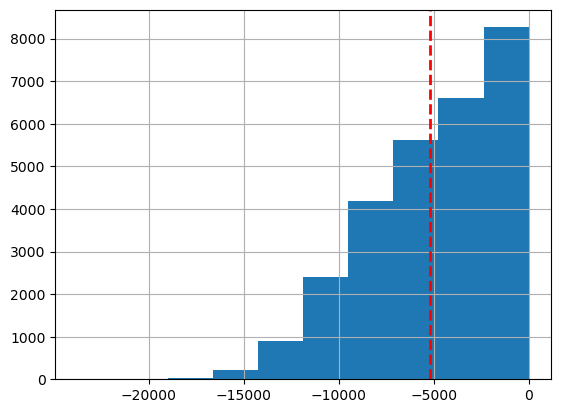

In [ ]:
def plot_column_data(colonne, valeur_affichee=None):
    if colonne.dtype == 'float':
        colonne.hist()
        if valeur_affichee is not None:
            plt.axvline(x=valeur_affichee, color='red', linestyle='dashed', linewidth=2)
        plt.show()
    elif colonne.dtype == 'int64':
        colonne.value_counts().plot(kind='bar')
        if valeur_affichee is not None:
            plt.axvline(x=colonne[colonne == valeur_affichee].index[0], color='red', linestyle='dashed', linewidth=2)
        plt.show()
    elif colonne.dtype == 'object':
        colonne.value_counts().plot(kind='bar')
        if valeur_affichee is not None:
            plt.axvline(x=colonne[colonne == valeur_affichee].index[0], color='red', linestyle='dashed', linewidth=2)
        plt.show()
    else:
        print("Type de données non pris en charge")

# Exemple d'utilisation
plot_column_data(client['DAYS_REGISTRATION'], -5170.0)

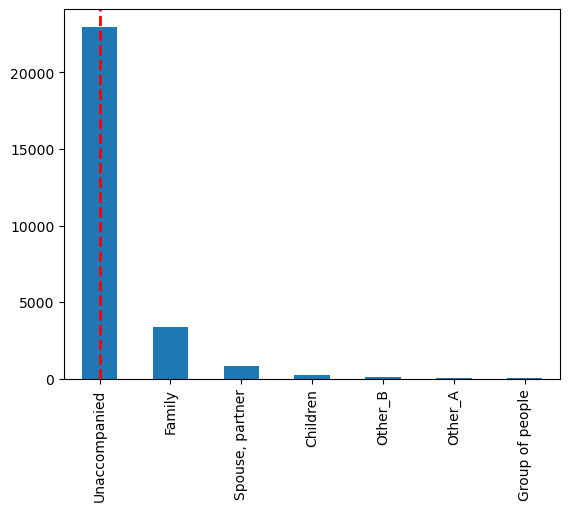

In [ ]:
plot_column_data(client['NAME_TYPE_SUITE'], 'Unaccompanied')

In [ ]:
for i in range(5):
    globals()[f'fr{i}'] = 2

In [ ]:
data = pd.read_csv(r'C:\Users\Hilbert\Documents\OpenClassRoom\Projet_7\client_app.csv')

In [ ]:
data['SK_ID_CURR']

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
28201    305766
28202    305773
28203    305776
28204    305777
28205    305809
Name: SK_ID_CURR, Length: 28206, dtype: int64

In [ ]:
data[data['DAYS_REGISTRATION']==-5000]['SK_ID_CURR']

13668    198997
17646    227993
17784    228831
18380    233517
Name: SK_ID_CURR, dtype: int64

In [ ]:
def plot_column_data(param_ids, input_customer_id=None):
    
    figures = []

    for i, param_id in enumerate(param_ids):
        if data[param_id].dtype == 'float':
            fig = px.histogram(data[param_id], nbins=30)
            if input_customer_id is not None:
                valeur_affichee = data[data['SK_ID_CURR'] == input_customer_id][param_id].values[0]
                print(valeur_affichee)
                fig.add_shape(
                    type='line',
                    x0=valeur_affichee,
                    x1=valeur_affichee,
                    y0=0,
                    y1=1,
                    line=dict(color='red', width=2, dash='dash')
                )
            figures.append(fig)
        elif data[param_id].dtype == 'int64':
            value_counts = data[param_id].value_counts()
            fig = px.bar(x=value_counts.index, y=value_counts.values)
            if input_customer_id is not None:
                valeur_affichee = data[data['SK_ID_CURR'] == input_customer_id][param_id].values[0]
                fig.add_shape(
                    type='line',
                    x0=valeur_affichee,
                    x1=valeur_affichee,
                    y0=0,
                    y1=value_counts.max(),
                    line=dict(color='red', width=2, dash='dash')
                )
            figures.append(fig)
        elif data[param_id].dtype == 'object':
            value_counts = data[param_id].value_counts()
            fig = px.bar(x=value_counts.index, y=value_counts.values)
            if input_customer_id is not None:
                valeur_affichee = data[data['SK_ID_CURR'] == input_customer_id][param_id].values[0]
                fig.add_shape(
                    type='line',
                    x0=str(value_counts.index[0]),
                    x1=str(value_counts.index[0]),
                    y0=0,
                    y1=value_counts.max(),
                    line=dict(color='red', width=2, dash='dash')
                )
            figures.append(fig)
        else:
            print(f"Type de données non pris en charge pour {param_id}")

    return figures

In [ ]:
import plotly.express as px

def plot_column_data(param_ids, input_customer_id=None):
    figures = []

    for i, param_id in enumerate(param_ids):
        if data[param_id].dtype == 'float':
            fig = px.histogram(data[param_id], nbins=30)
            if input_customer_id is not None:
                valeur_affichee = data[data['SK_ID_CURR'] == input_customer_id][param_id].values[0]
                fig.add_shape(
                    type='line',
                    x0=valeur_affichee,
                    x1=valeur_affichee,
                    y0=0,
                    y1=1,
                    line=dict(color='red', width=2, dash='dash')
                )
                
                # Find the bin index corresponding to valeur_affichee
                bin_index = next(
                    (i for i, bin_edge in enumerate(fig.data[0].x[:-1]) if bin_edge <= valeur_affichee < fig.data[0].x[i + 1]),
                    len(fig.data[0].x) - 1
                )

                # Update the color of the selected bin to red
                fig.update_traces(marker_color=['red' if i == bin_index else 'blue' for i in range(len(fig.data[0].x) - 1)])

                # Add black marker lines for visibility
                fig.update_traces(marker_line_color='black', marker_line_width=1, selector=dict(type='bar'))

                # Update layout to add black borders to bars and hide legend
                fig.update_layout(bargap=0.1, bargroupgap=0.1, showlegend=False)

                # Add annotation for the exact value of valeur_affichee at the center of the bin
                bin_center = (fig.data[0].x[bin_index] + fig.data[0].x[bin_index + 1]) / 2
                bin_height = fig.data[0].y[bin_index] if fig.data[0].y is not None else 0

                fig.add_annotation(
                    x=bin_center,
                    y=bin_height,
                    text=str(valeur_affichee),
                    showarrow=True,
                    arrowhead=2,
                    arrowcolor='black',
                    arrowwidth=2,
                    font=dict(color='black')
                )

            figures.append(fig)
        elif data[param_id].dtype == 'int64':
            value_counts = data[param_id].value_counts()
            fig = px.bar(x=value_counts.index, y=value_counts.values)
            if input_customer_id is not None:
                valeur_affichee = data[data['SK_ID_CURR'] == input_customer_id][param_id].values[0]
                fig.add_shape(
                    type='line',
                    x0=valeur_affichee,
                    x1=valeur_affichee,
                    y0=0,
                    y1=value_counts.max(),
                    line=dict(color='red', width=2, dash='dash')
                )
            figures.append(fig)
        elif data[param_id].dtype == 'object':
            value_counts = data[param_id].value_counts()
            fig = px.bar(x=value_counts.index, y=value_counts.values)
            if input_customer_id is not None:
                valeur_affichee = data[data['SK_ID_CURR'] == input_customer_id][param_id].values[0]
                fig.add_shape(
                    type='line',
                    x0=str(value_counts.index[0]),
                    x1=str(value_counts.index[0]),
                    y0=0,
                    y1=value_counts.max(),
                    line=dict(color='red', width=2, dash='dash')
                )
            figures.append(fig)
        else:
            print(f"Type de données non pris en charge pour {param_id}")

    return figures


In [76]:
numeric_columns = data.select_dtypes(include=['number']).columns

# Parcourez les colonnes numériques et appliquez la transformation
for col in numeric_columns:
    if (data[col] < 0).all():
        data[col] = data[col].abs()

In [ ]:
p=plot_column_data(['DAYS_REGISTRATION','NAME_TYPE_SUITE','NAME_INCOME_TYPE'], input_customer_id=228831)

In [ ]:
p[0]


In [ ]:
def plot_column_data(paramètres_id, input_customer_id=None):
    valeur_affichee = None
    if input_customer_id is not None:
        valeur_affichee = data[data['SK_ID_CURR'] == input_customer_id][paramètres_id].values[0]
    
    if data[paramètres_id].dtype == 'float':
        fig = px.histogram(data[paramètres_id])
        if valeur_affichee is not None:
            fig.add_shape(
                dict(
                    type='line',
                    x0=valeur_affichee,
                    x1=valeur_affichee,
                    y0=0,
                    y1=1,
                    line=dict(color='red', width=2, dash='dash')
                )
            )
        return fig
    elif data[paramètres_id].dtype == 'int64':
        fig = px.bar(x=data[paramètres_id].value_counts().index, y=data[paramètres_id].value_counts().values)
        if valeur_affichee is not None:
            fig.add_shape(
                dict(
                    type='line',
                    x0=valeur_affichee,
                    x1=valeur_affichee,
                    y0=0,
                    y1=data[paramètres_id].value_counts().max(),
                    line=dict(color='red', width=2, dash='dash')
                )
            )
        return  fig
    elif data[paramètres_id].dtype == 'object':
        fig = px.bar(x=data[paramètres_id].value_counts().index, y=data[paramètres_id].value_counts().values)
        if valeur_affichee is not None:
            fig.add_shape(
                dict(
                    type='line',
                    x0=valeur_affichee,
                    x1=valeur_affichee,
                    y0=0,
                    y1=data[paramètres_id].value_counts().max(),
                    line=dict(color='red', width=2, dash='dash')
                )
            )
        return fig
    else:
        return "Type de données non pris en charge", None


In [ ]:
data['DAYS_REGISTRATION']=(-1)*data['DAYS_REGISTRATION']

In [ ]:
import plotly.express as px

# Assuming data is your DataFrame
input_customer_id = 228831

valeur_affichee = data[data['SK_ID_CURR'] == input_customer_id]['DAYS_REGISTRATION'].values

if len(valeur_affichee) > 0:
    valeur_affichee = valeur_affichee[0]

    print("valeur_affichee:", valeur_affichee)

    # Create histogram with color
    fig = px.histogram(
        data,
        x='DAYS_REGISTRATION',
        nbins=30,
        color=data['DAYS_REGISTRATION'] == valeur_affichee,
        color_discrete_map={True: 'red', False: 'blue'}
    )

    # Find the bin index corresponding to valeur_affichee
    bin_index = next(
        (i for i, bin_edge in enumerate(fig.data[0].x[:-1]) if bin_edge <= valeur_affichee < fig.data[0].x[i + 1]),
        len(fig.data[0].x) - 1
    )

    # Update the color of the selected bin to red
    fig.update_traces(marker_color=['red' if i == bin_index else 'blue' for i in range(len(fig.data[0].x) - 1)])

    # Add black marker lines for visibility
    fig.update_traces(marker_line_color='black', marker_line_width=1, selector=dict(type='bar'))

    # Update layout to add black borders to bars and hide legend
    fig.update_layout(bargap=0.1, bargroupgap=0.1, showlegend=False)

    # Add annotation for the exact value of valeur_affichee at the center of the bin
    bin_center = (fig.data[0].x[bin_index] + fig.data[0].x[bin_index + 1]) / 2
    bin_height = fig.data[0].y[bin_index] if fig.data[0].y is not None else 0

    fig.add_annotation(
        x=bin_center,
        y=bin_height,
        text=str(valeur_affichee),
        showarrow=True,
        arrowhead=2,
        arrowcolor='black',
        arrowwidth=2,
        font=dict(color='black')
    )

    # Show the figure
    fig.show()
else:
    print(f"No data found for SK_ID_CURR: {input_customer_id}")


valeur_affichee: 5000.0
